In [3]:
import pandas as pd
import numpy as np


Website Dataframe info

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_data

In [5]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [6]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
dtype: int64

In [7]:
X.shape

(253680, 21)

In [8]:
def check_columns(df):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, and the data type of the column.
    The resulting dataframe is sorted by the 'Number of Unique Values' column in ascending order.
​
    Args:
    - df: pandas dataframe
​
    Returns:
    - pandas dataframe
    """
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, and data type to the data list
        data.append(
            [
                column,
                df[column].nunique(),
                df[column].unique(),
                df[column].isna().sum(),
                df[column].isna().mean(),
                df[column].dtype
            ]
        )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', and 'dtype'
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "Column Name",
            "Number of Unique Values",
            "Unique Values",
            "Number of Null Values",
            "Proportion of Null Values",
            "dtype"
        ],
    ).sort_values(by="Number of Unique Values")

In [9]:
check_columns(X)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,HighBP,2,"[1, 0]",0,0.0,int64
17,Sex,2,"[0, 1]",0,0.0,int64
16,DiffWalk,2,"[1, 0]",0,0.0,int64
12,NoDocbcCost,2,"[0, 1]",0,0.0,int64
11,AnyHealthcare,2,"[1, 0]",0,0.0,int64
9,Veggies,2,"[1, 0]",0,0.0,int64
8,Fruits,2,"[0, 1]",0,0.0,int64
10,HvyAlcoholConsump,2,"[0, 1]",0,0.0,int64
6,HeartDiseaseorAttack,2,"[0, 1]",0,0.0,int64
5,Stroke,2,"[0, 1]",0,0.0,int64


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv


### 1. diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


In [10]:
diabetes_df1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [11]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [13]:
diabetes_df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [14]:
diabetes_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# X df and diabetes_df1 are the same, just diff dtype:   USE DIABETES_DF1 (it has diabetes cat already appended to it)

### 2. diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.


In [15]:
diabetes_50_50 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [16]:
diabetes_50_50.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [17]:
diabetes_50_50.shape

(70692, 22)

### 3. diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

In [18]:
diabetes_df2 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [19]:
diabetes_df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [20]:
check_columns(diabetes_df2)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,Diabetes_binary,2,"[0.0, 1.0]",0,0.0,float64
18,Sex,2,"[0.0, 1.0]",0,0.0,float64
17,DiffWalk,2,"[1.0, 0.0]",0,0.0,float64
13,NoDocbcCost,2,"[0.0, 1.0]",0,0.0,float64
12,AnyHealthcare,2,"[1.0, 0.0]",0,0.0,float64
11,HvyAlcoholConsump,2,"[0.0, 1.0]",0,0.0,float64
9,Fruits,2,"[0.0, 1.0]",0,0.0,float64
8,PhysActivity,2,"[0.0, 1.0]",0,0.0,float64
10,Veggies,2,"[1.0, 0.0]",0,0.0,float64
6,Stroke,2,"[0.0, 1.0]",0,0.0,float64


In [21]:
check_columns(diabetes_df1)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
10,Veggies,2,"[1.0, 0.0]",0,0.0,float64
1,HighBP,2,"[1.0, 0.0]",0,0.0,float64
2,HighChol,2,"[1.0, 0.0]",0,0.0,float64
3,CholCheck,2,"[1.0, 0.0]",0,0.0,float64
18,Sex,2,"[0.0, 1.0]",0,0.0,float64
5,Smoker,2,"[1.0, 0.0]",0,0.0,float64
6,Stroke,2,"[0.0, 1.0]",0,0.0,float64
7,HeartDiseaseorAttack,2,"[0.0, 1.0]",0,0.0,float64
8,PhysActivity,2,"[0.0, 1.0]",0,0.0,float64
9,Fruits,2,"[0.0, 1.0]",0,0.0,float64


# Lets start with the first dataframe

diabetes_df1

In [22]:
diabetes_df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [23]:
check_columns(diabetes_df1)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
10,Veggies,2,"[1.0, 0.0]",0,0.0,float64
1,HighBP,2,"[1.0, 0.0]",0,0.0,float64
2,HighChol,2,"[1.0, 0.0]",0,0.0,float64
3,CholCheck,2,"[1.0, 0.0]",0,0.0,float64
18,Sex,2,"[0.0, 1.0]",0,0.0,float64
5,Smoker,2,"[1.0, 0.0]",0,0.0,float64
6,Stroke,2,"[0.0, 1.0]",0,0.0,float64
7,HeartDiseaseorAttack,2,"[0.0, 1.0]",0,0.0,float64
8,PhysActivity,2,"[0.0, 1.0]",0,0.0,float64
9,Fruits,2,"[0.0, 1.0]",0,0.0,float64


In [24]:
# lets lowercase the columns
diabetes_df1.columns = diabetes_df1.columns.str.lower()

In [25]:
check_columns(diabetes_df1)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
10,veggies,2,"[1.0, 0.0]",0,0.0,float64
1,highbp,2,"[1.0, 0.0]",0,0.0,float64
2,highchol,2,"[1.0, 0.0]",0,0.0,float64
3,cholcheck,2,"[1.0, 0.0]",0,0.0,float64
18,sex,2,"[0.0, 1.0]",0,0.0,float64
5,smoker,2,"[1.0, 0.0]",0,0.0,float64
6,stroke,2,"[0.0, 1.0]",0,0.0,float64
7,heartdiseaseorattack,2,"[0.0, 1.0]",0,0.0,float64
8,physactivity,2,"[0.0, 1.0]",0,0.0,float64
9,fruits,2,"[0.0, 1.0]",0,0.0,float64


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
# lets make the split for train, validate, test
def split_data(df, target=None) -> tuple:
    '''
    split_data will split data into train, validate, and test sets
    
    if a discrete target is in the data set, it may be specified
    with the target kwarg (Default None)
    
    return: three pandas DataFrames
    '''
    train_val, test = train_test_split(
        df, 
        train_size=0.8, 
        random_state=1108,
        stratify=df[target])
    train, validate = train_test_split(
        train_val,
        train_size=0.7,
        random_state=1108,
        stratify=train_val[target])
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    return train, validate, test

In [28]:
train, validate, test = split_data(diabetes_df1, target='diabetes_012')

Train: 0.5599968464206875
Validate: 0.2400031535793125
Test: 0.2


In [29]:
diabetes_df1.diabetes_012.shape

(253680,)

In [30]:
diabetes_df1.shape

(253680, 22)

In [31]:
train.head()

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
167250,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,7.0,1.0,0.0,8.0,5.0,5.0
188878,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
140271,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,20.0,0.0,1.0,11.0,4.0,3.0
240633,0.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,12.0,4.0,5.0
105700,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,10.0,6.0,8.0


In [32]:
diabetes_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   diabetes_012          253680 non-null  float64
 1   highbp                253680 non-null  float64
 2   highchol              253680 non-null  float64
 3   cholcheck             253680 non-null  float64
 4   bmi                   253680 non-null  float64
 5   smoker                253680 non-null  float64
 6   stroke                253680 non-null  float64
 7   heartdiseaseorattack  253680 non-null  float64
 8   physactivity          253680 non-null  float64
 9   fruits                253680 non-null  float64
 10  veggies               253680 non-null  float64
 11  hvyalcoholconsump     253680 non-null  float64
 12  anyhealthcare         253680 non-null  float64
 13  nodocbccost           253680 non-null  float64
 14  genhlth               253680 non-null  float64
 15  

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
columns = train.columns

# Explore

# DIABETES_DF1: diabetes_012(target), 0=No Diabetes, 1=Prediabetic, 2=Diabetic

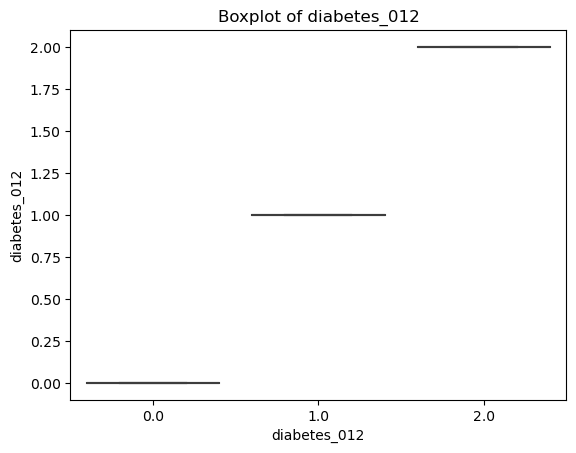

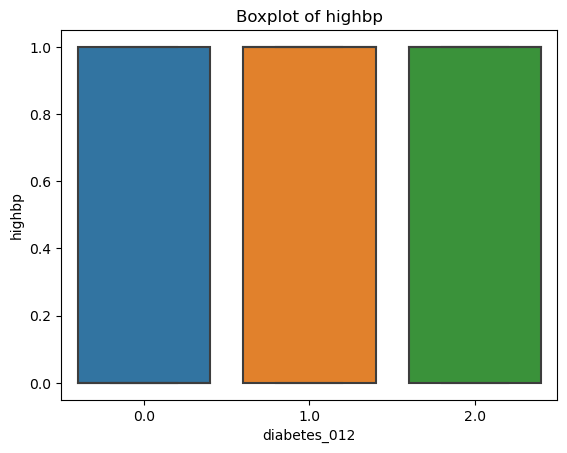

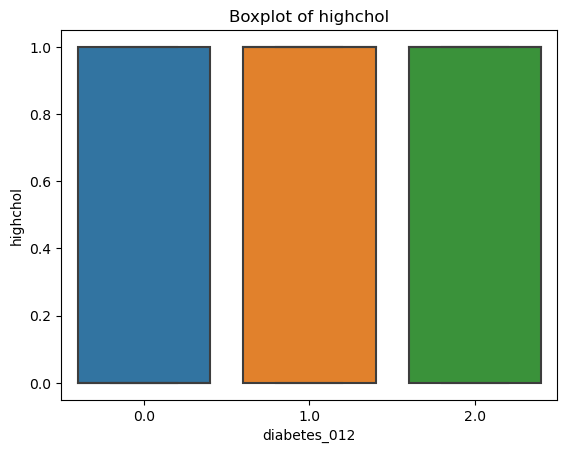

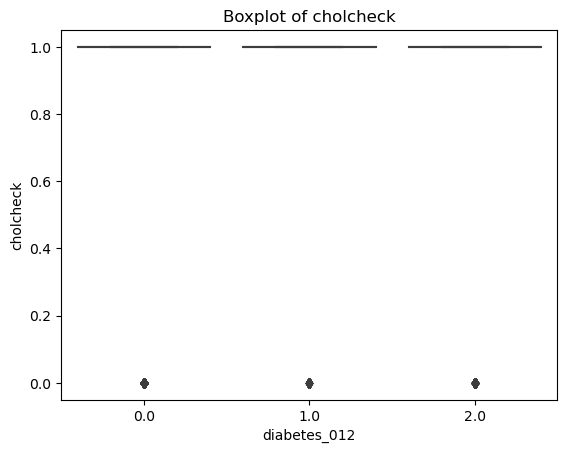

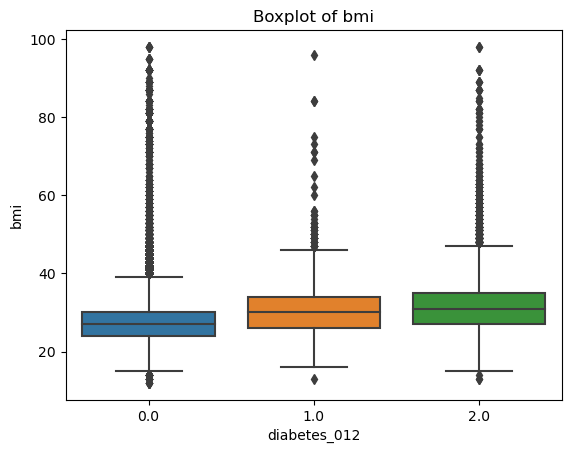

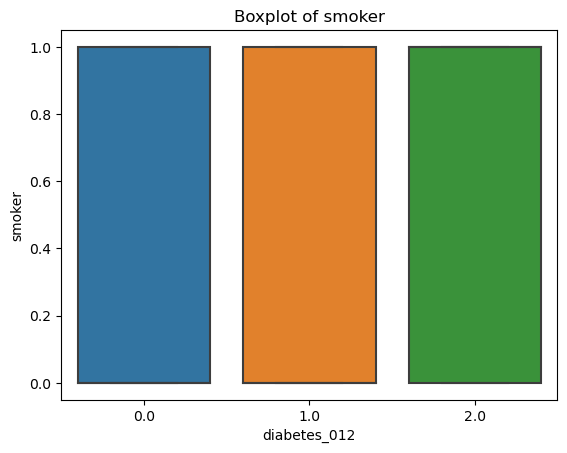

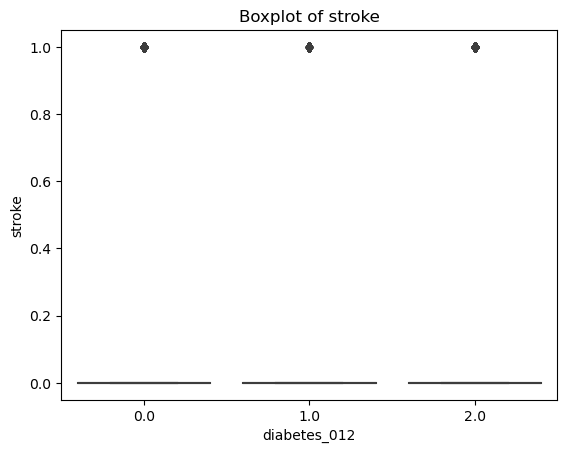

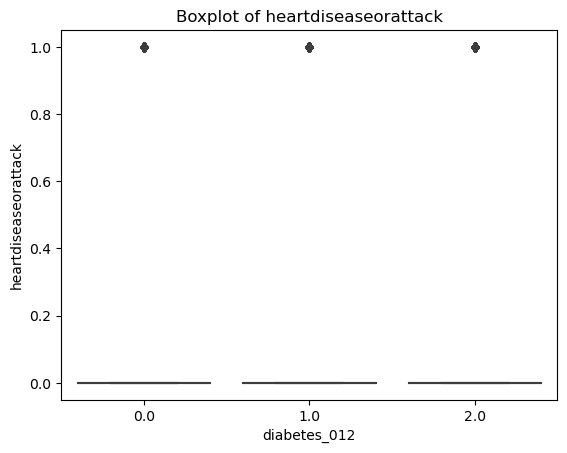

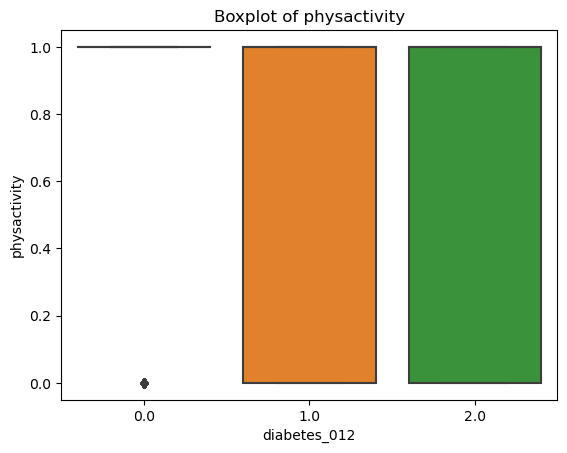

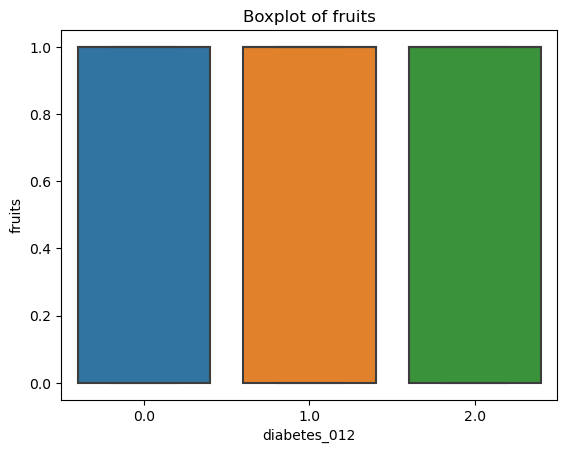

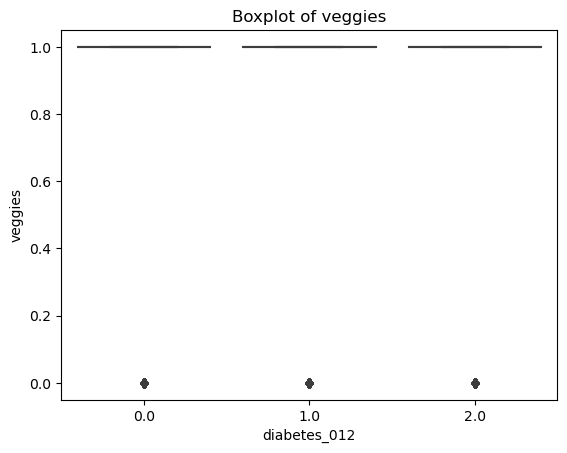

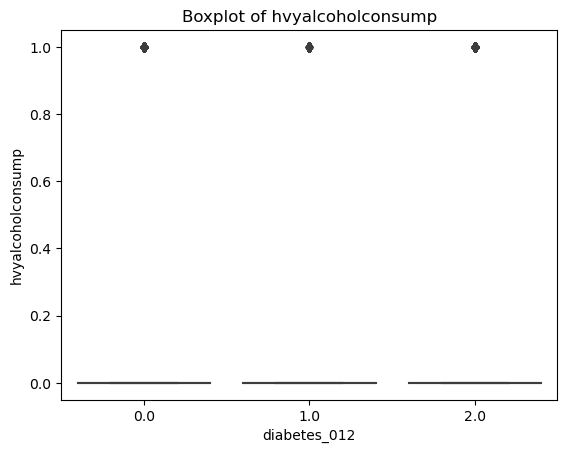

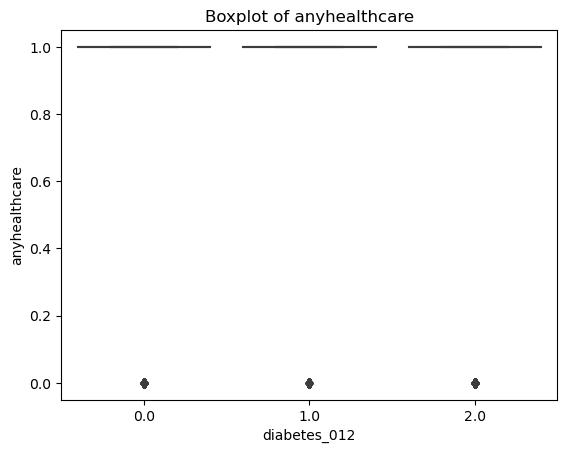

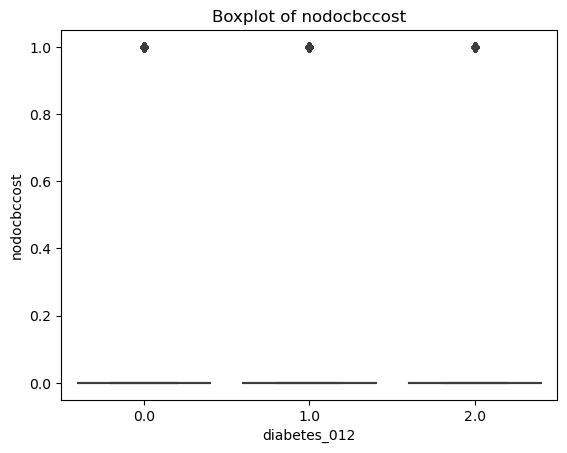

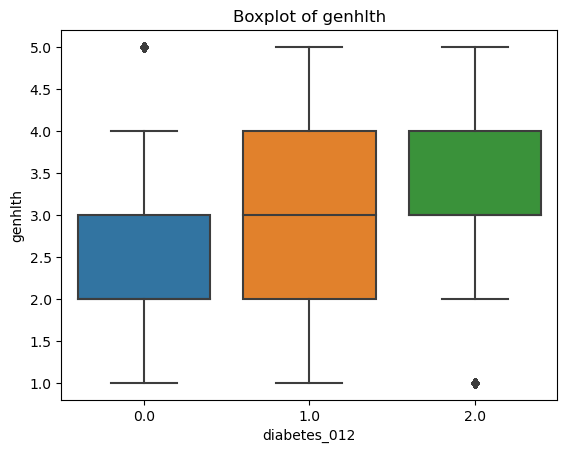

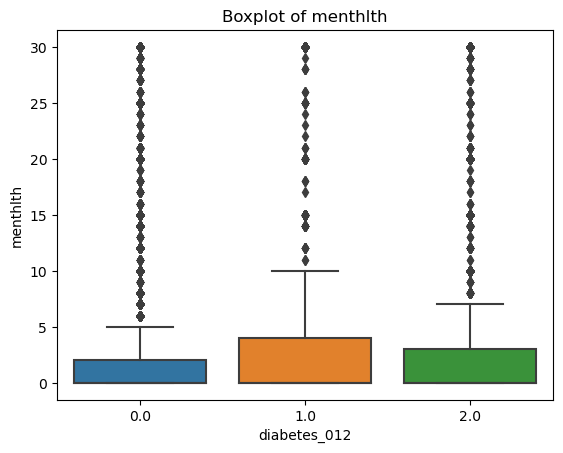

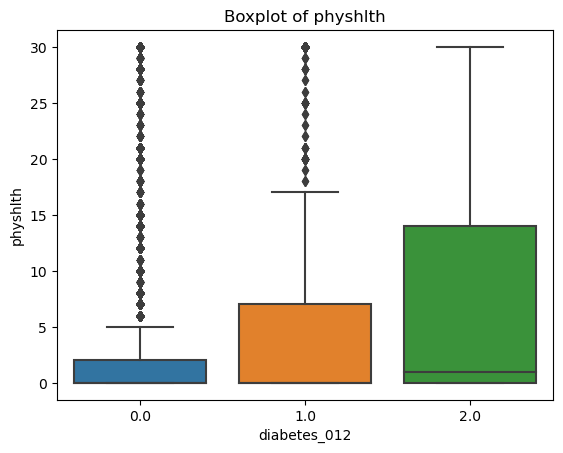

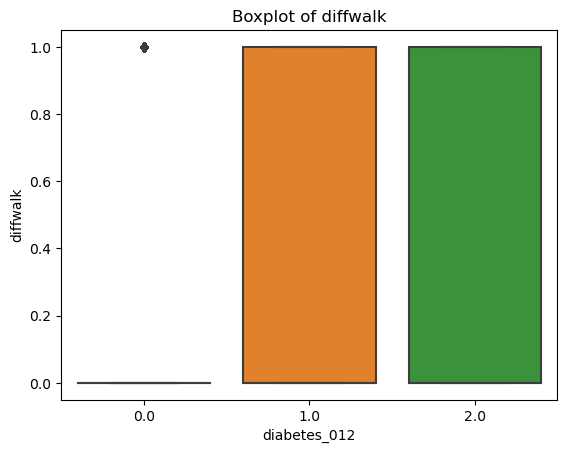

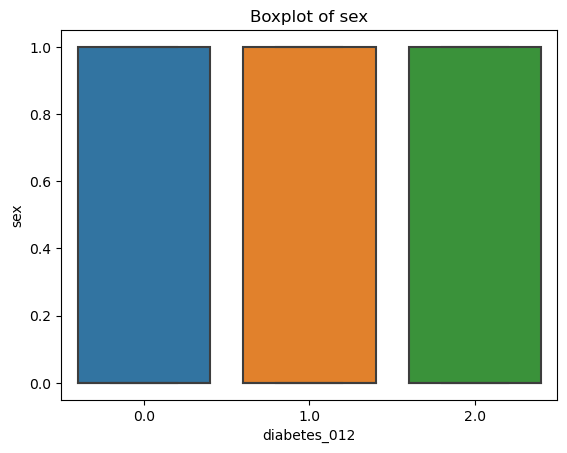

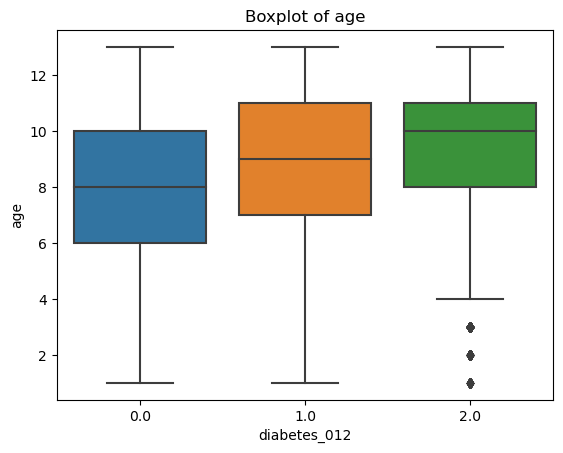

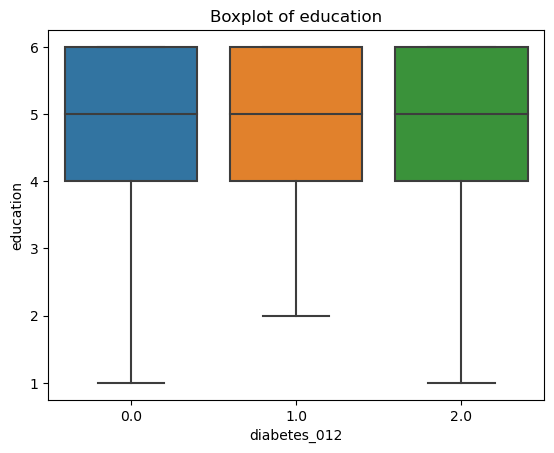

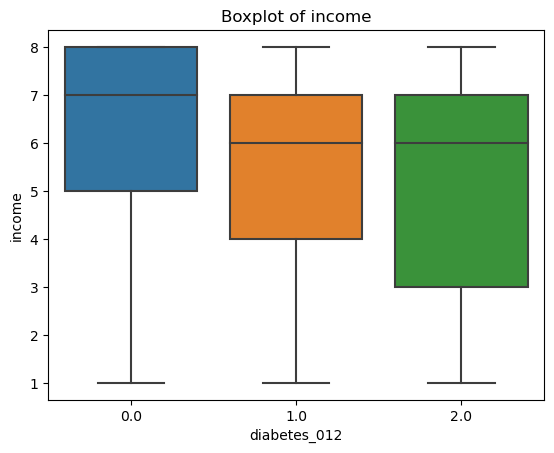

In [35]:
for col in train:
    sns.boxplot(data=train, x='diabetes_012', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

### Whats categories of features do we have?


In [36]:
dietary = ['veggies', 'fruits']
bloodwork = ['highbp', 'highchol', 'cholcheck']
exercise = ['physactivity', 'diffwalk']
negative_att = ['smoker', 'stroke', 'heartdiseaseorattack', 'hvyalcoholconsump']
healthcare = ['anyheaalthcare', 'nodocbccost']

### What features have the best correlation to diabetes_012?

In [37]:
train.shape


(142060, 22)

In [38]:
# sns.pairplot(train.sample(14206), hue='diabetes_012')

In [39]:
def corr_heat(df, drops):
    '''Creates a heatmap off of the dataset
    
    arguments: df, 'drop items'
    
    returns: heatmap visualization'''
    sns.heatmap(df.drop(columns=drops).corr(), center=1)
    plt.title('Correlation Heatmap')

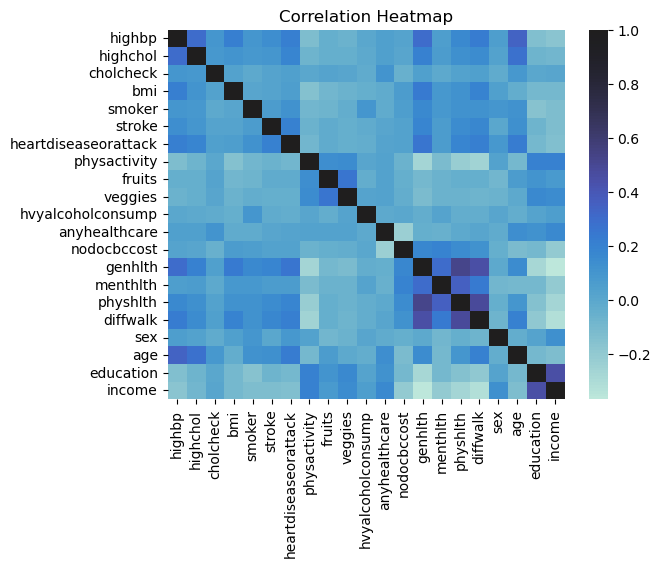

In [40]:
corr_heat(train, 'diabetes_012')

In [41]:
def column_split(df):
    '''Takes the qualitative and quantitative columns and splits them
    as such. Ex: cat_cols, num_cols = column_split(df)
    
    arguments: dataframe
    
    return: cat_cols, num_cols'''

    # separating our numeric and categorical columns:
    # initialize two empty lists for each type:
    cat_cols, num_cols = [], []
    # set up a for loop to build those lists out:
    # so for every column in explore_columns:
    for col in df:
        # check to see if its an object type,
        # if so toss it in categorical
        if df[col].dtype == 'O':
            cat_cols.append(col)
        # otherwise if its numeric:
        else:
            # check to see if we have more than just a few values:
            # if thats the case, toss it in categorical
            if df[col].nunique() < 10:
                cat_cols.append(col)
            # and otherwise call it continuous by elimination
            else:
                num_cols.append(col)

    return cat_cols, num_cols

In [42]:
def stacked_plot(col_to_stack, df):
    '''Takes the prepared columns from column_split function and plots
    stacked percentage graphs of each category.
    
    arguments: column list, dataframe
    
    return: visual barcharts'''
    
    for index, column in enumerate(col_to_stack):
        bar_by_cat = pd.crosstab(df[column], df['diabetes_012']).apply(lambda x: x/x.sum()*100, axis=1)
        bar_by_cat.plot(kind='bar', stacked=True)
        plt.ylabel('Percentage')
        plt.xlabel(column)

In [43]:
cat_cols, num_cols = column_split(train)

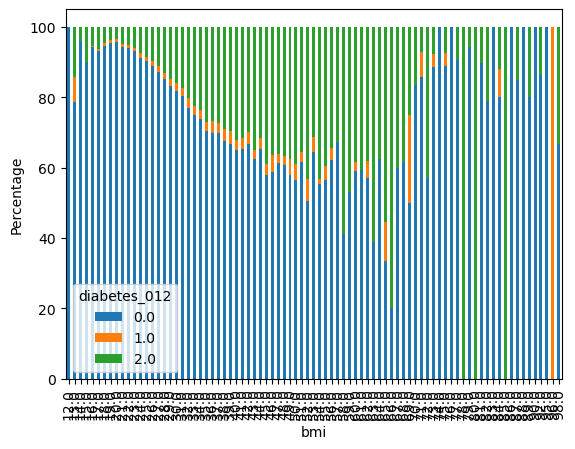

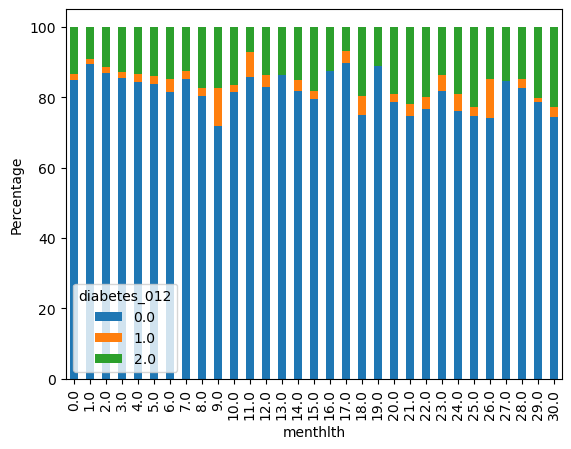

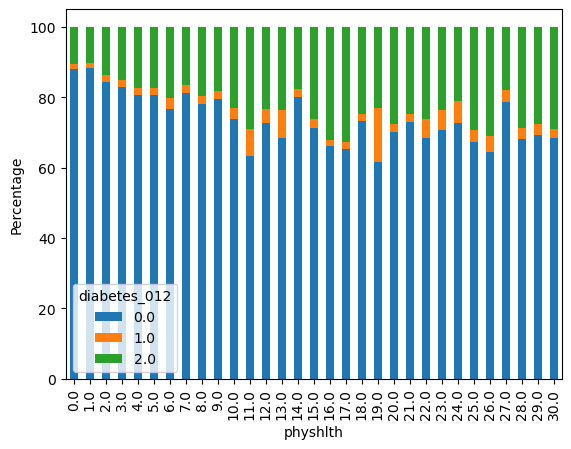

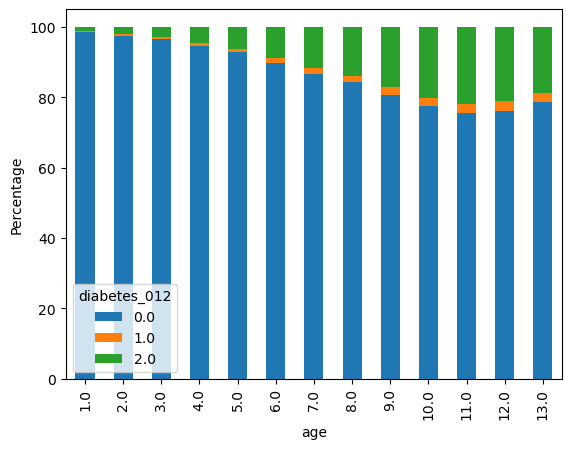

In [44]:
stacked_plot(num_cols, train)

### Age Category = 

* 1 = 18 - 24
* 2 = 25 - 30
* 3 = 30 - 35
* 4 = 35 - 40 
* 5 = 40 - 45
* 6 = 45 - 50
* 7 = 50 - 55
* 8 = 55 - 60
* 9 = 60 - 65
* 10 = 65 - 70
* 11 = 70 - 75
* 12 = 75 - 80
* 13 = 80 and Older

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '13.0'),
  Text(2, 0, '14.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '17.0'),
  Text(6, 0, '18.0'),
  Text(7, 0, '19.0'),
  Text(8, 0, '20.0'),
  Text(9, 0, '21.0'),
  Text(10, 0, '22.0'),
  Text(11, 0, '23.0'),
  Text(12, 0, '24.0'),
  Text(13, 0, '25.0'),
  Text(14, 0, '26.0'),
  Text(15, 0, '27.0'),
  Text(16, 0, '28.0'),
  Text(17, 0, '29.0'),
  Text(18, 0, '30.0'),
  Text(19, 0, '31.0'),
  Text(20, 0, '32.0'),
  Text(21, 0, '33.0'),
  Text(22, 0, '34.0'),
  Text(23, 0, '35.0'),
  Text(24, 0, '36.0'),
  Text(25, 0, '37.0'),
  Text(26, 0, '38.0'),
  Text(27, 0, '

<Figure size 3000x2000 with 0 Axes>

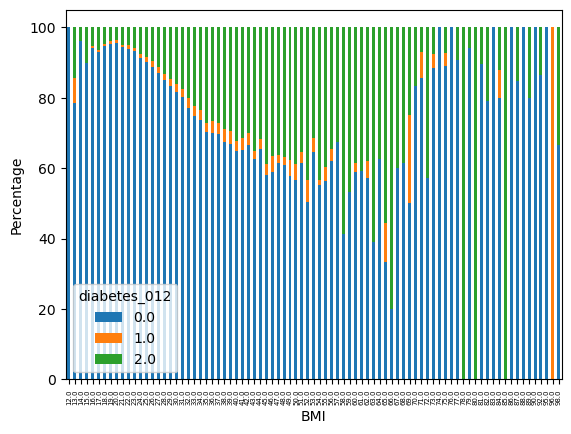

In [45]:
plt.figure(figsize=(30,20))
bar_by_cat = pd.crosstab(train['bmi'], train['diabetes_012']).apply(lambda x: x/x.sum()*100, axis=1)
bar_by_cat.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.xlabel('BMI')
plt.xticks(fontsize=5)

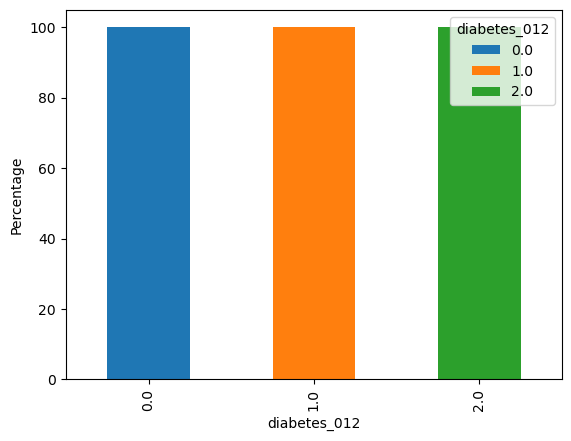

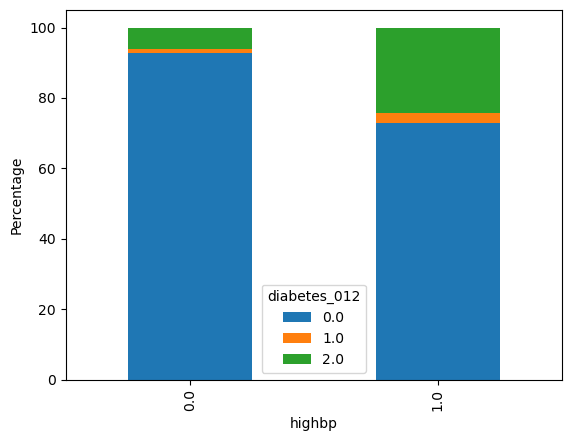

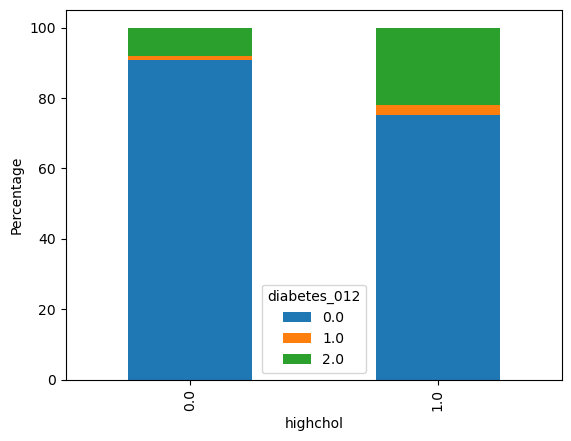

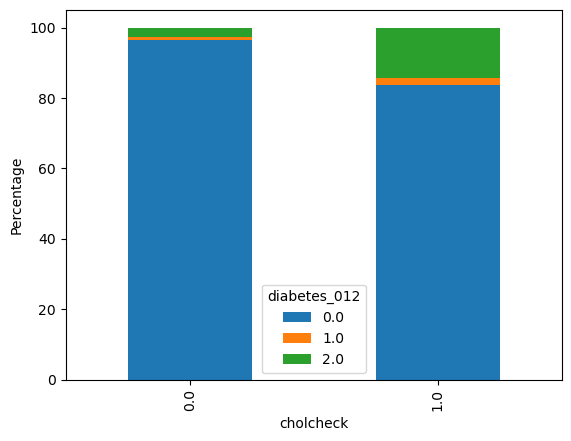

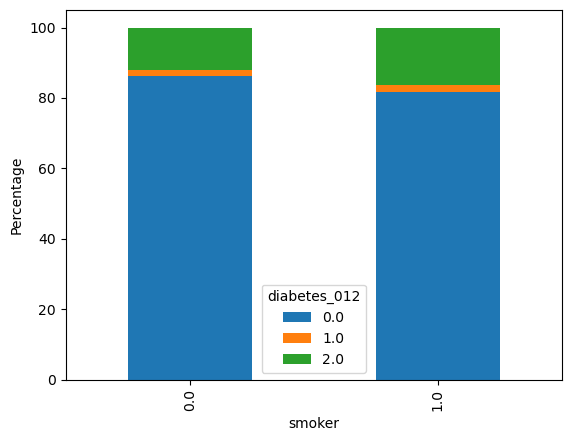

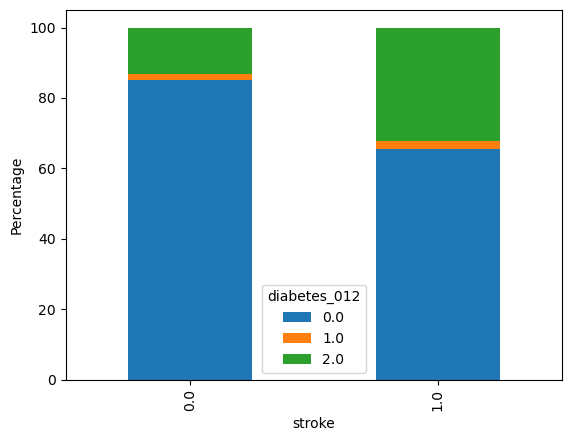

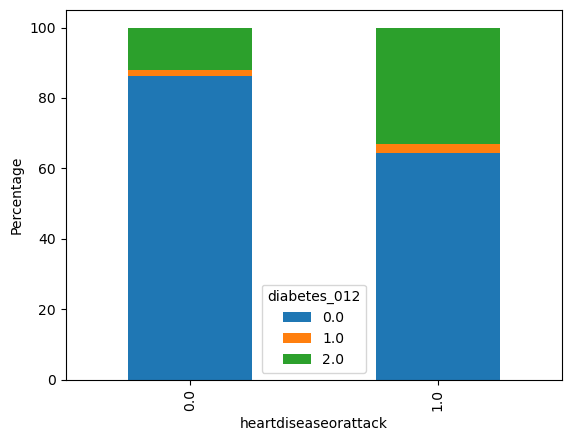

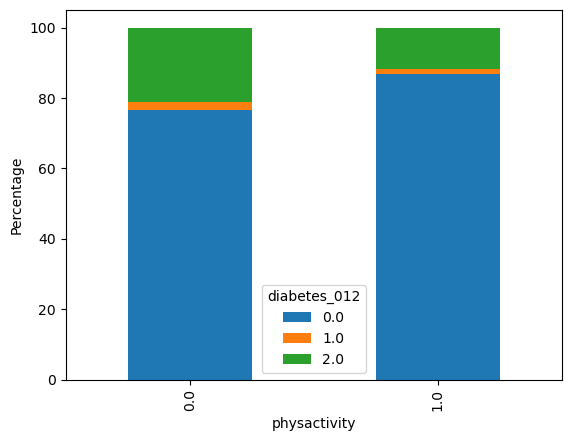

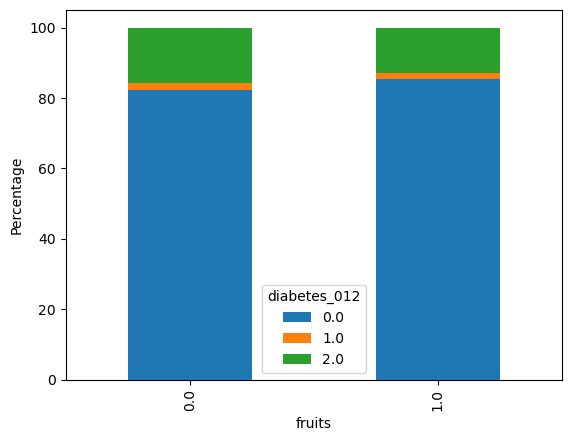

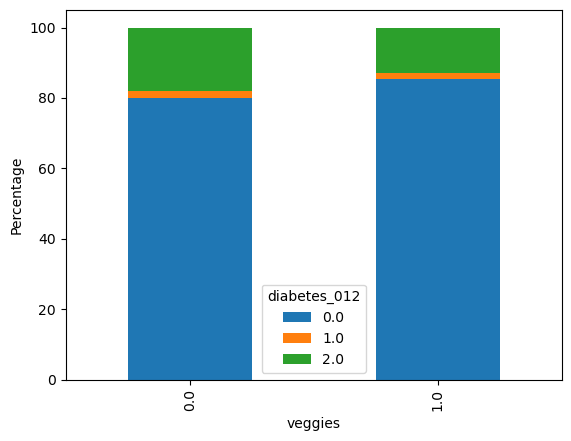

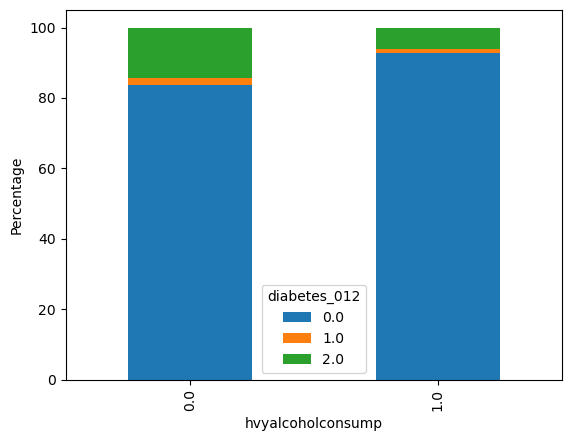

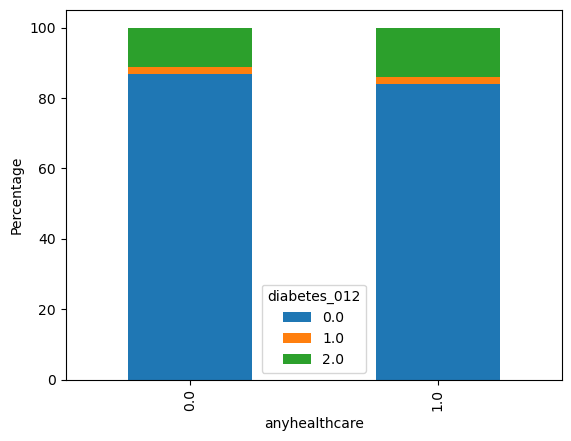

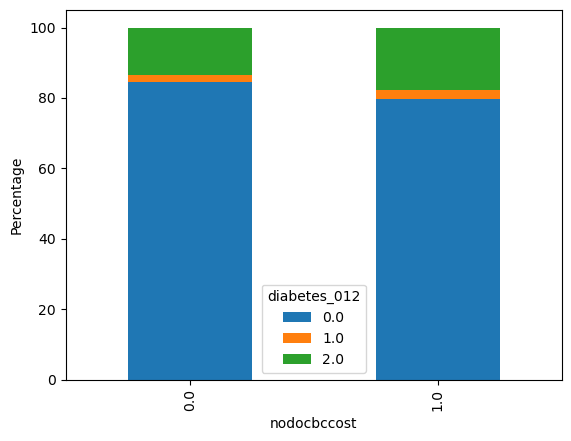

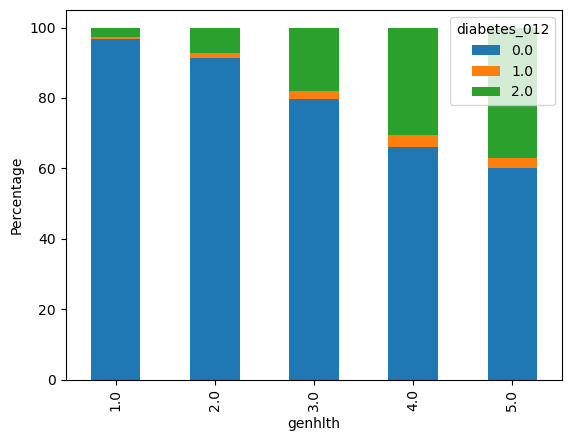

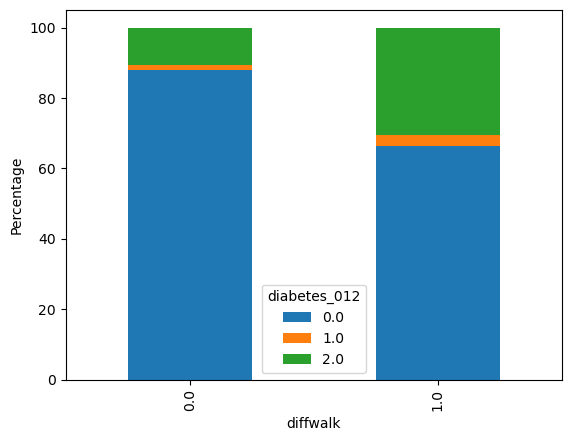

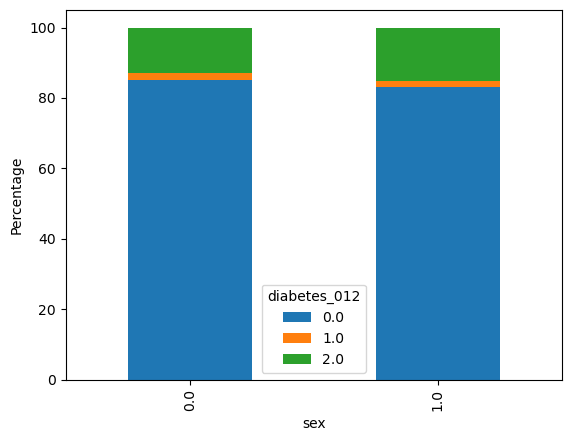

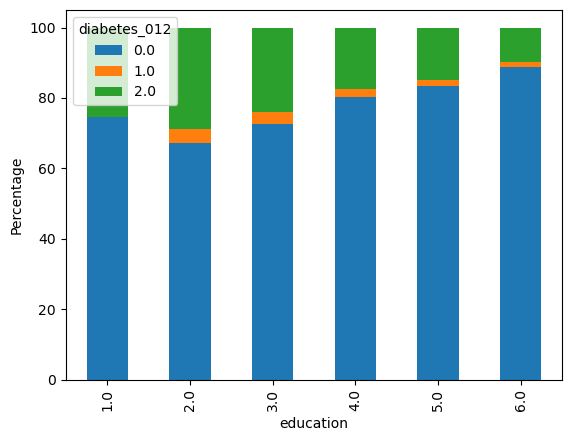

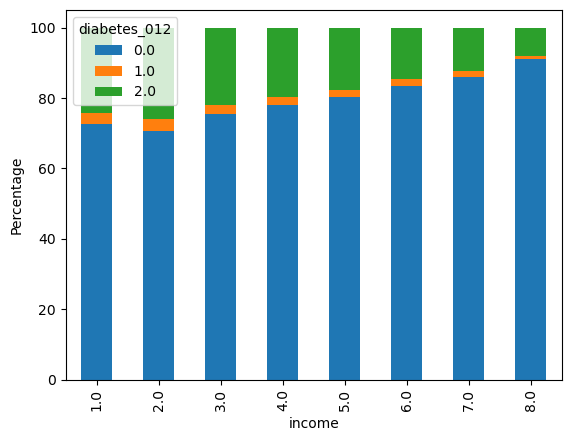

In [46]:
stacked_plot(cat_cols, train)

Xtra Notes for xplore

- age and diabetes_012
    - increases as age increases

- highbp/highchol/cholcheck
    - higher percentage for those with thoses who answered yes

- smoker
    - appears higher rate of diabetes in smokers

- stroke/heartdiseaseorattack
    - very large diff between those who have had a stroke and diabetes

- physactivity/fruits/veggies/
    - those who are not active have increased % in diabetes

- hvyalcoholconsump
    - could be skewed due to the question
    - more ppl lie about how much they drink
    - this is saying that more ppl who are not heavy drinkers have a higher % of diatetes

- anyhealthcare/nodocbccost
    - not much derived from this one

- genhlth
    - appears to be more % of diabetics the poorer the health

- diffwalk
    - diabetics have a higher chance of diff walking

- sex
    - doesnt appear to be alot of diff between if you are male or female

- education
    - lower education shows more diabetics

- income
    - lower income increases perc of diabetics

### Which ones to really look at?


- THERE ARE SIMILARITIES IN THE BAR GRAPHS FOR THESE GROUPS

* highbp/highchol/cholcheck
* smoker
* stroke/heartdiseaseorattack
* physactivity/fruits/veggies
* education/income

In [47]:
explore_cols = ['highbp', 'highchol', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'education', 'income']

In [48]:
def bar_plotter(df, x, explore_cols, hue):
    plt.figure(figsize=(16,6))
    for i, col in explore_cols:
        plot_num = i+1
        plt.subplot(2,4, plot_num)
        plt.title(col)
        sns.barplot(data=df, x=x, y=col, hue=hue)
        plt.grid(False)

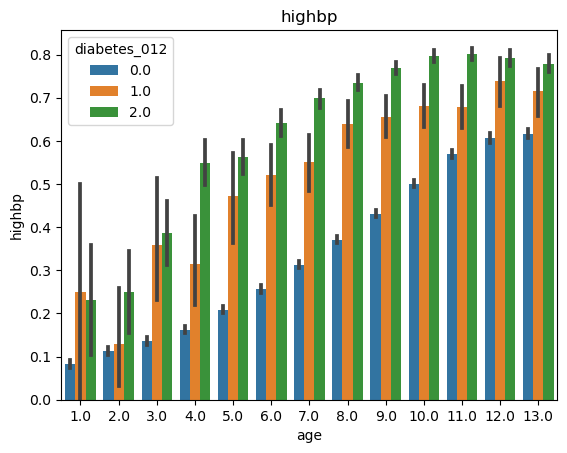

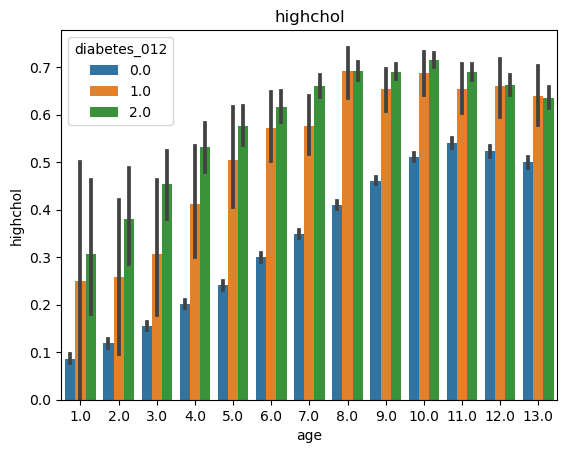

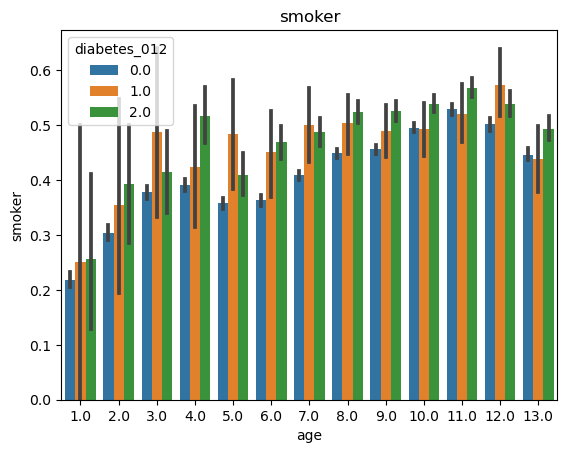

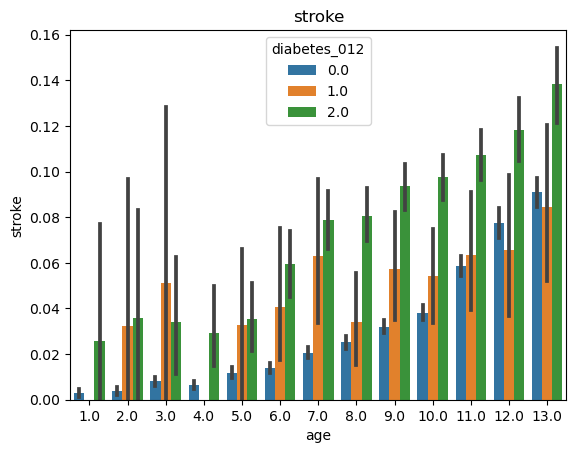

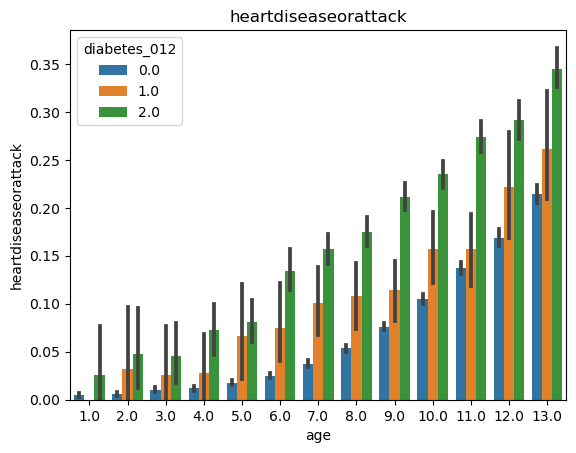

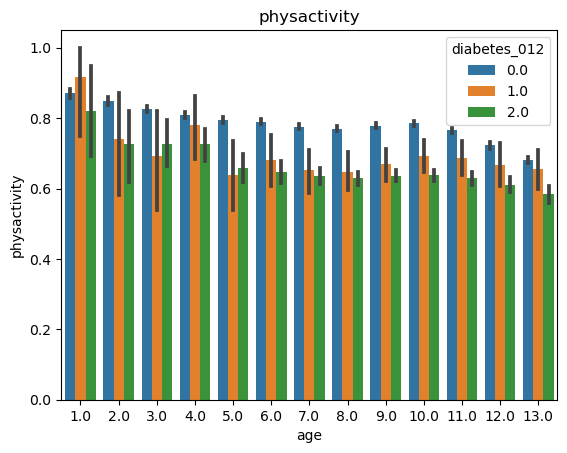

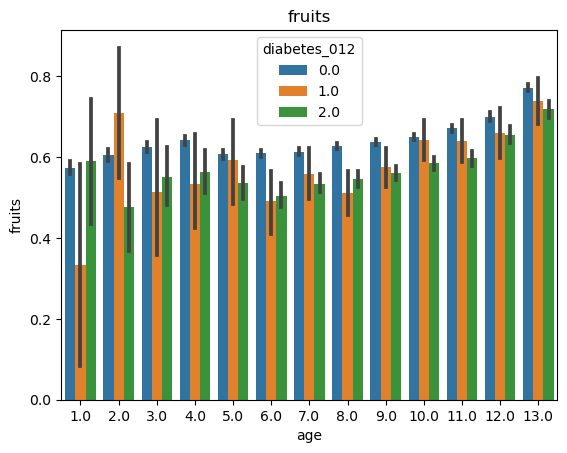

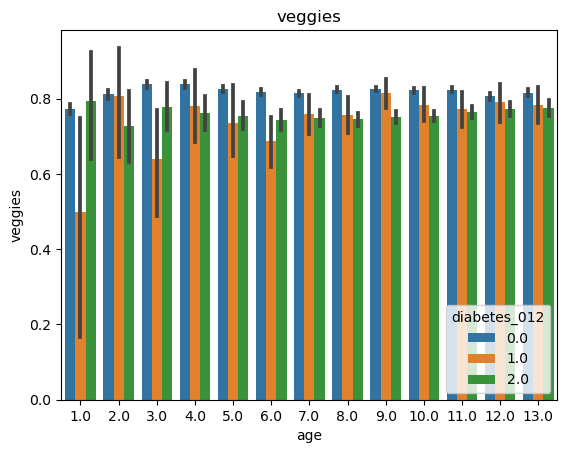

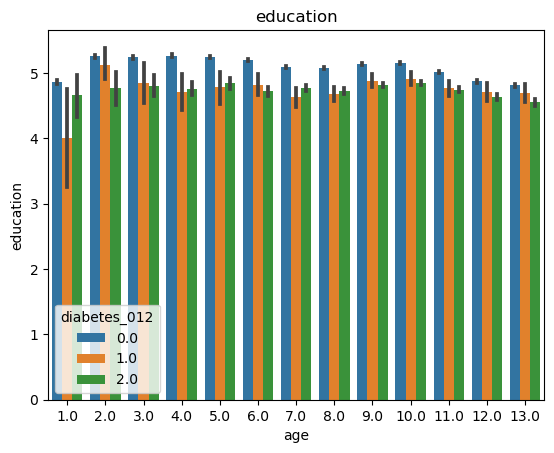

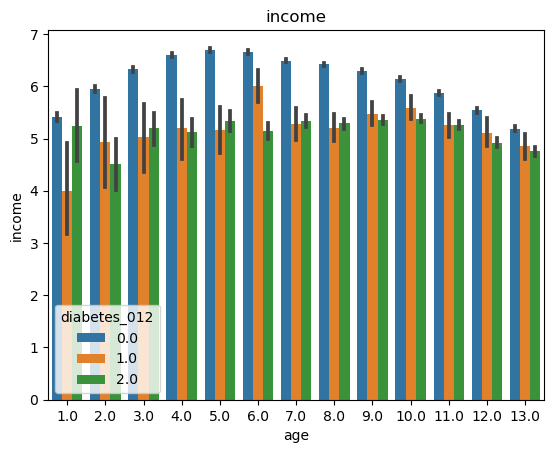

In [49]:
for col in explore_cols:
        plt.title(col)
        sns.barplot(data=train, x='age', y=col, hue='diabetes_012')
        plt.grid(False)
        plt.show()

## It appears that as you get older the percentage that have high blood pressure increases and your chance to have diabetes does as well


## It appears that as you get older, high cholesterol also increases diabetes

## STATS FOR DIABETIC_DF1

Since these are all categorical features, we will need to use the Chi2 Tests

In [50]:
from scipy import stats

### highbp

In [51]:
observed = pd.crosstab(train.diabetes_012, train.highbp)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 10339.6872
p     = 0.0000


In [52]:
explore_cols

['highbp',
 'highchol',
 'smoker',
 'stroke',
 'heartdiseaseorattack',
 'physactivity',
 'fruits',
 'veggies',
 'education',
 'income']

In [53]:
alpha = 0.05

H0: feature is independent of diabetes_012<p>
Ha: feature in dependent of diabetes_012

In [54]:
observed = pd.crosstab(train.diabetes_012, train.highchol)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 6336.5529
p     = 0.0000
We reject the null hypothesis


In [55]:
observed = pd.crosstab(train.diabetes_012, train.smoker)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 612.7732
p     = 0.0000
We reject the null hypothesis


In [56]:
observed = pd.crosstab(train.diabetes_012, train.stroke)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 1718.8712
p     = 0.0000
We reject the null hypothesis


In [57]:
observed = pd.crosstab(train.diabetes_012, train.heartdiseaseorattack)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 4610.9443
p     = 0.0000
We reject the null hypothesis


In [58]:
observed = pd.crosstab(train.diabetes_012, train.physactivity)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 2078.8720
p     = 0.0000
We reject the null hypothesis


In [59]:
observed = pd.crosstab(train.diabetes_012, train.fruits)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 243.9118
p     = 0.0000
We reject the null hypothesis


In [60]:
observed = pd.crosstab(train.diabetes_012, train.veggies)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 479.1685
p     = 0.0000
We reject the null hypothesis


In [61]:
observed = pd.crosstab(train.diabetes_012, train.education)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 2480.6164
p     = 0.0000
We reject the null hypothesis


In [62]:
observed = pd.crosstab(train.diabetes_012, train.income)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi^2 = 4333.1145
p     = 0.0000
We reject the null hypothesis


## All features in the explore_cols list show some sort of dependency to determining diabetes_012

# EXPLORE

# DIABETES_DF2: diabetes_binary(target), 0=No Diabetes, 1=Diabetic

In [63]:
diabetes_df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [64]:
diabetes_df2.columns = diabetes_df2.columns.str.lower()

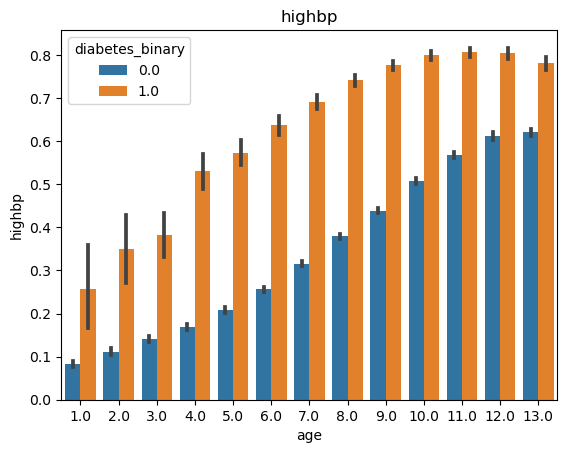

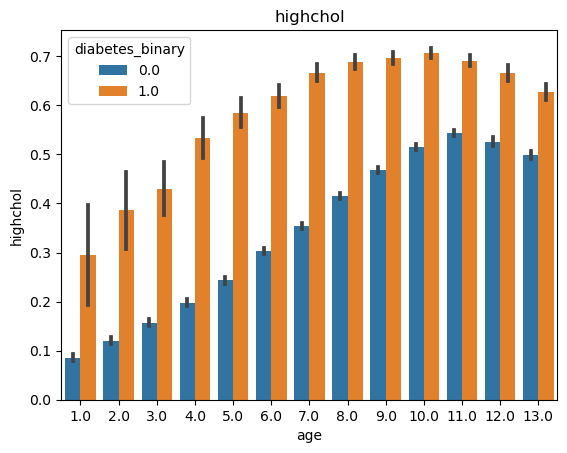

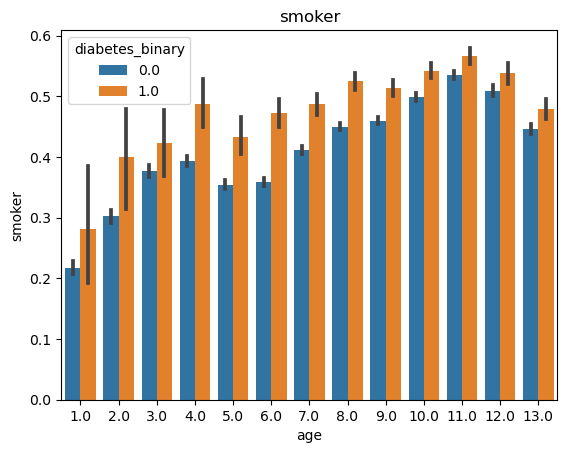

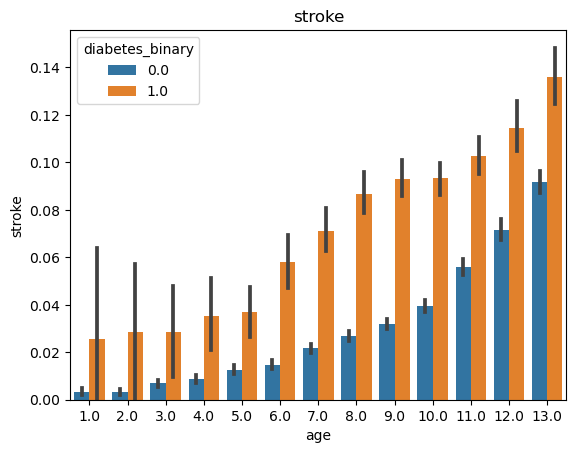

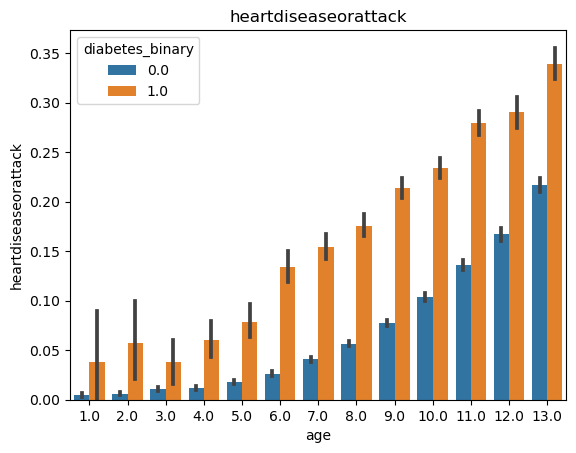

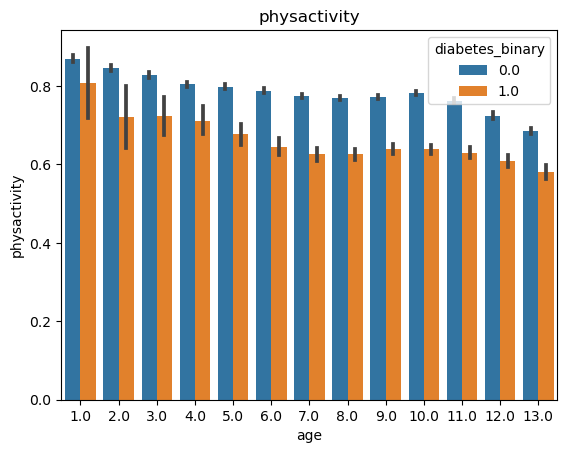

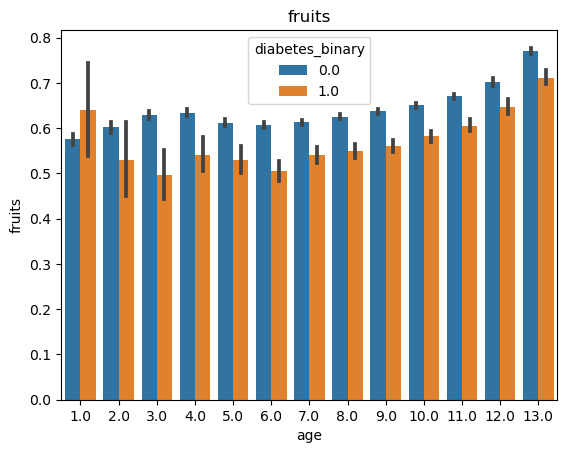

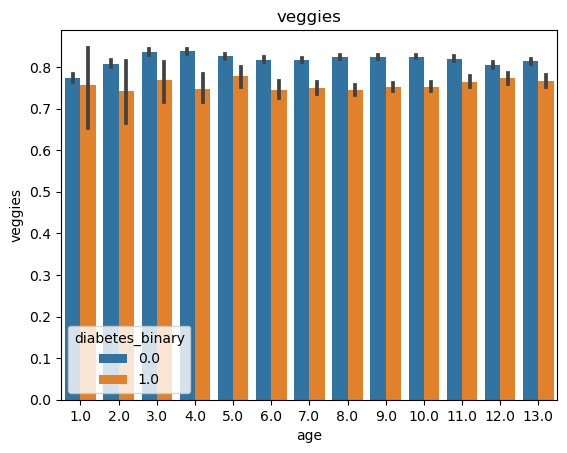

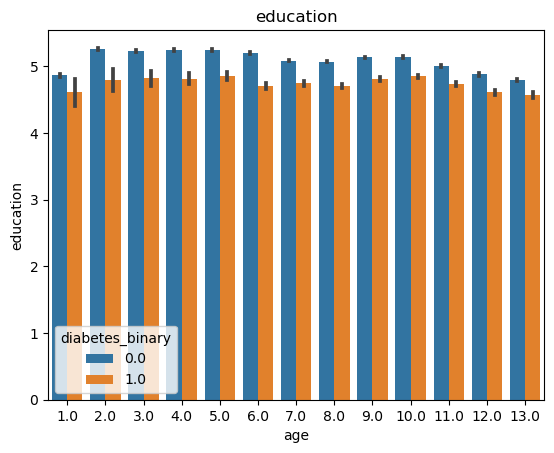

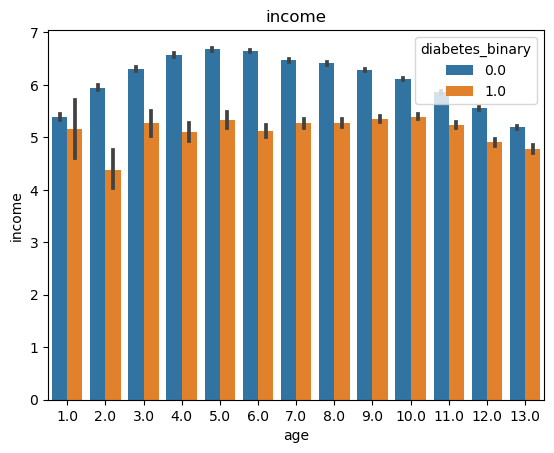

In [65]:
for col in explore_cols:
        plt.title(col)
        sns.barplot(data=diabetes_df2, x='age', y=col, hue='diabetes_binary')
        plt.grid(False)
        plt.show()

In [66]:
cat_cols, num_cols = column_split(diabetes_df2)

In [67]:
def stacked_plot(col_to_stack, df):
    '''Takes the prepared columns from column_split function and plots
    stacked percentage graphs of each category.
    
    arguments: column list, dataframe
    
    return: visual barcharts'''
    
    for index, column in enumerate(col_to_stack):
        bar_by_cat = pd.crosstab(df[column], df['diabetes_binary']).apply(lambda x: x/x.sum()*100, axis=1)
        bar_by_cat.plot(kind='bar', stacked=True)
        plt.ylabel('Percentage')
        plt.xlabel(column)

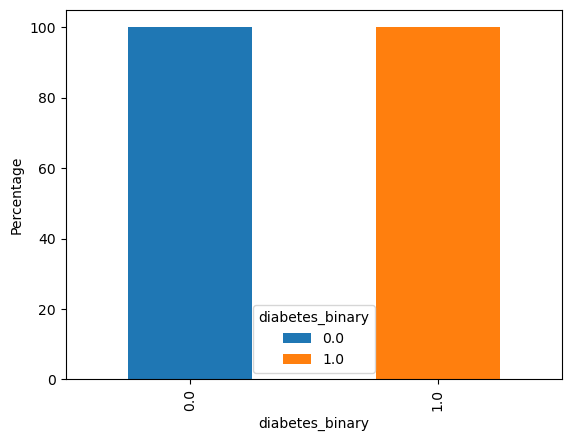

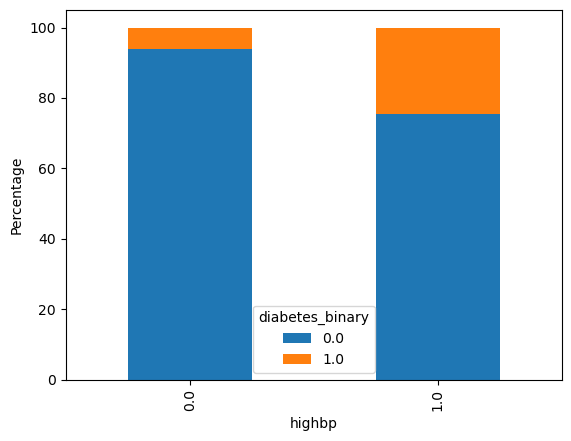

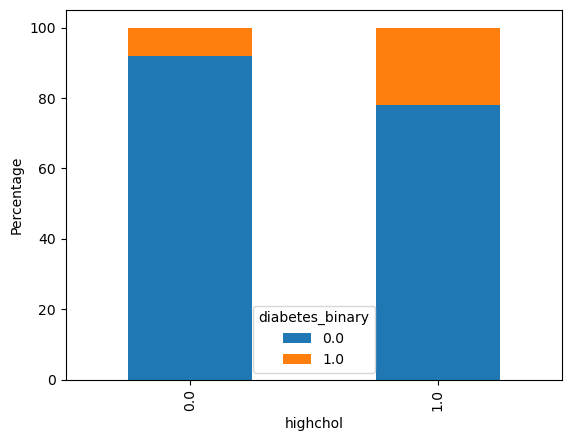

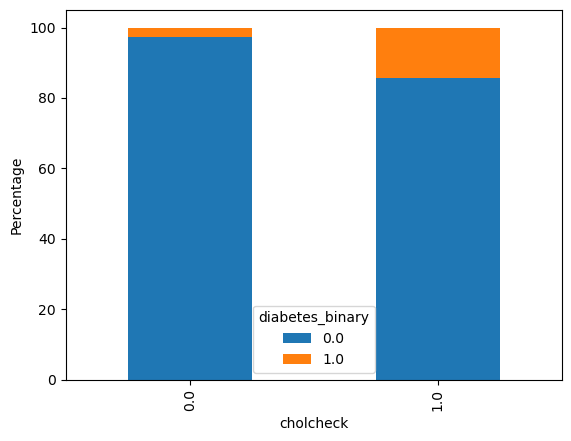

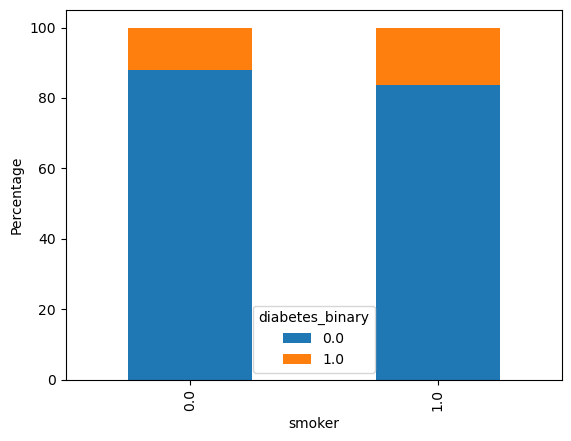

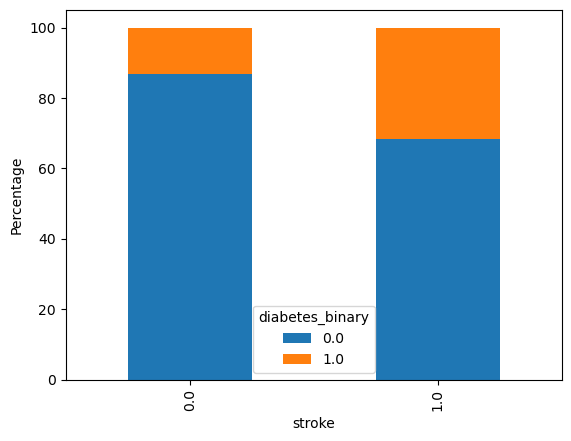

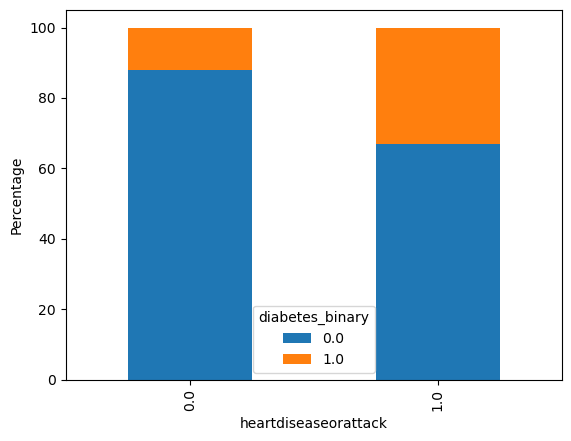

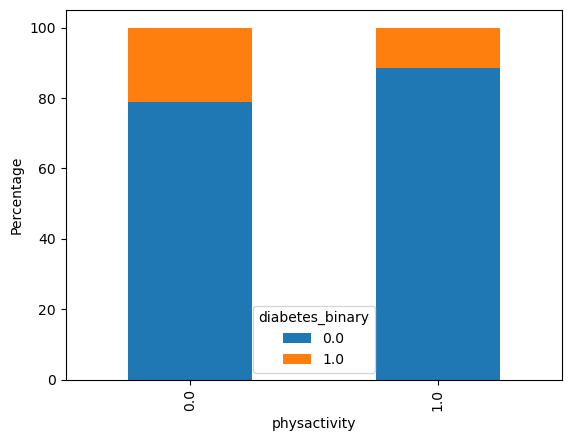

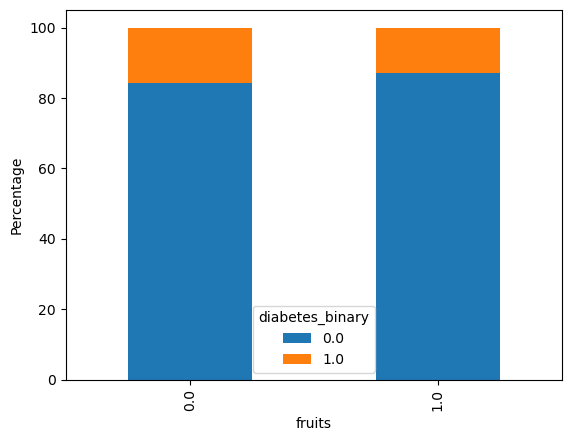

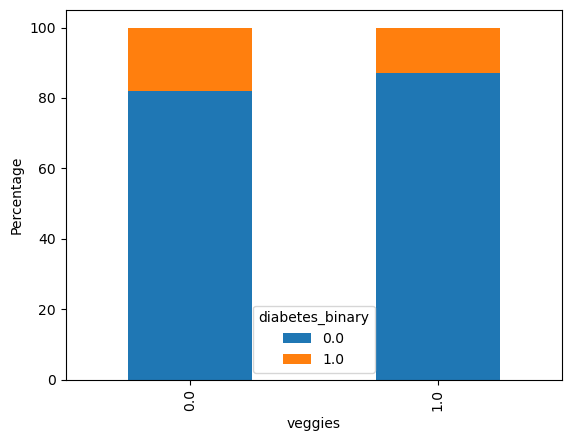

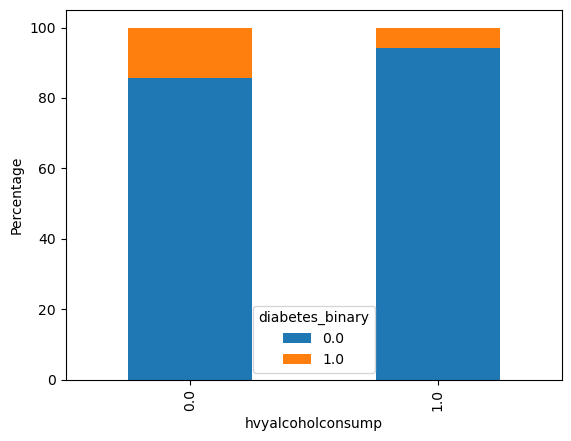

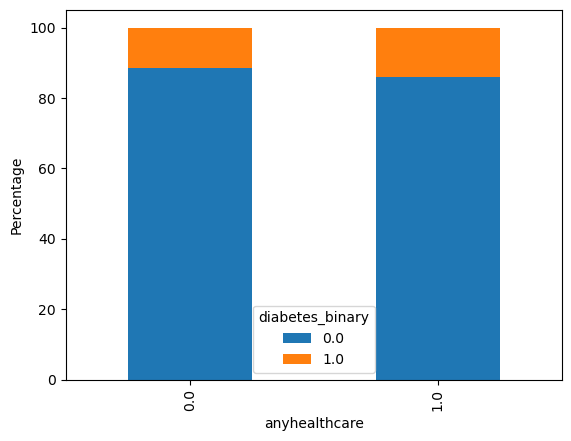

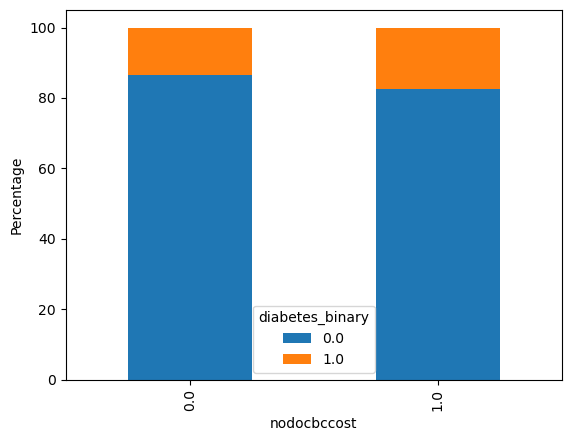

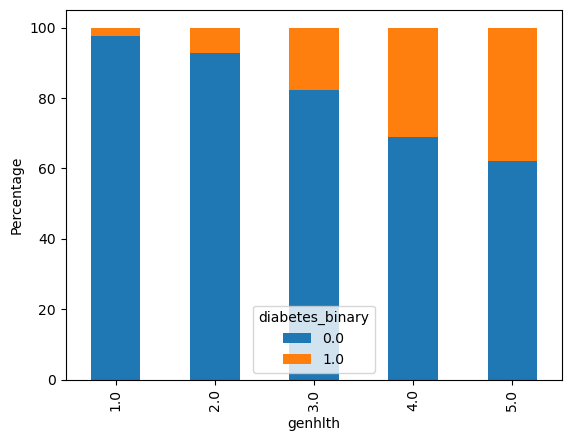

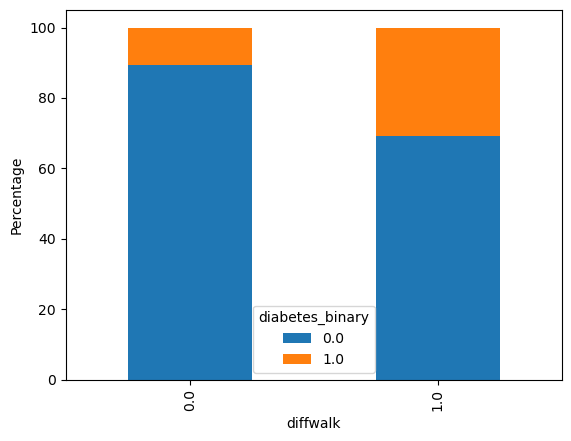

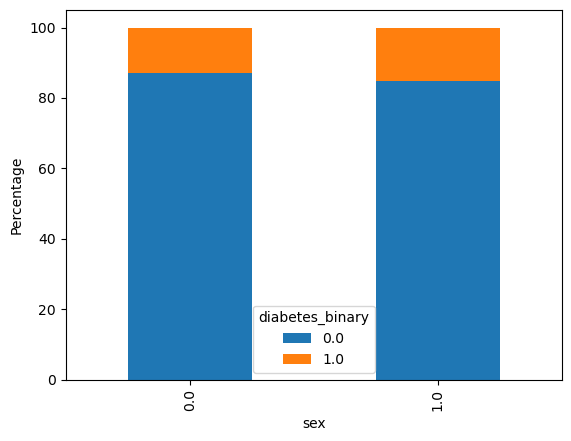

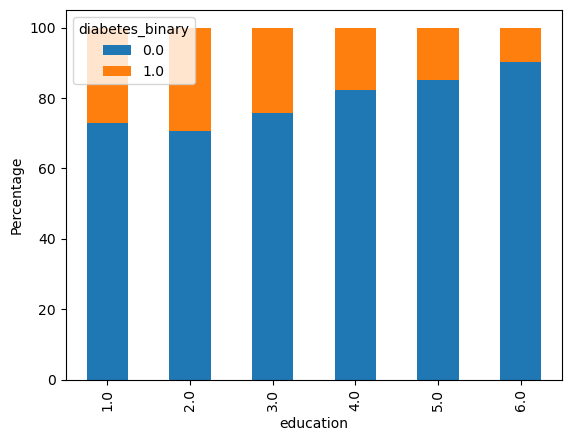

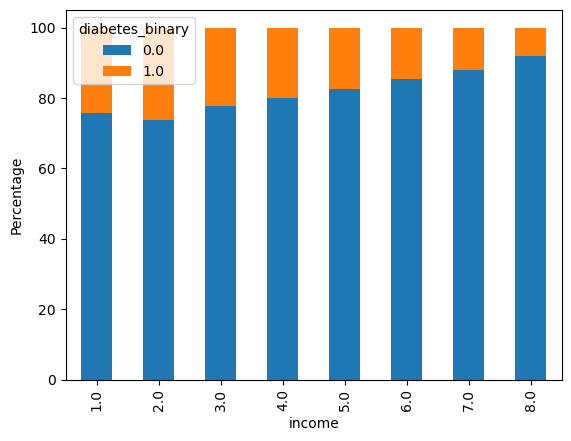

In [68]:
stacked_plot(cat_cols, diabetes_df2)

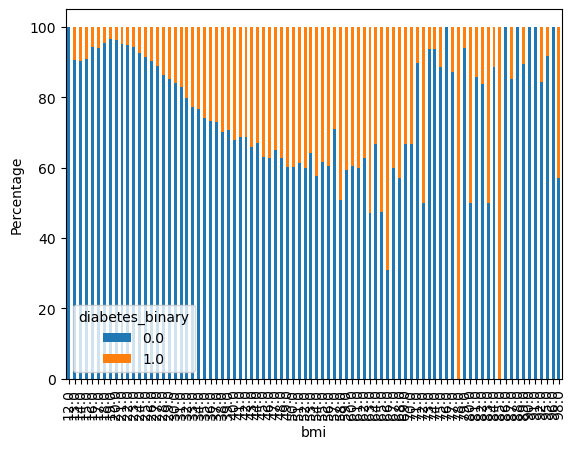

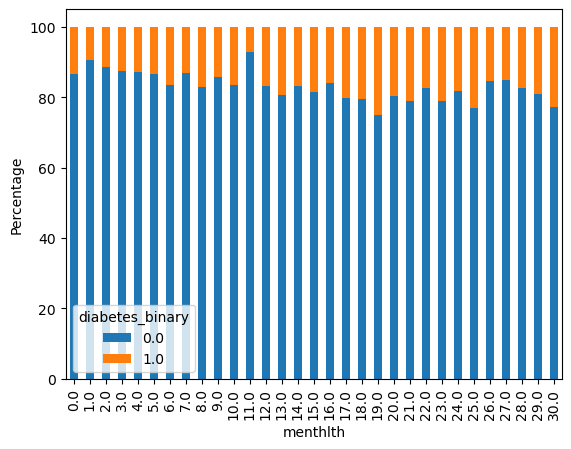

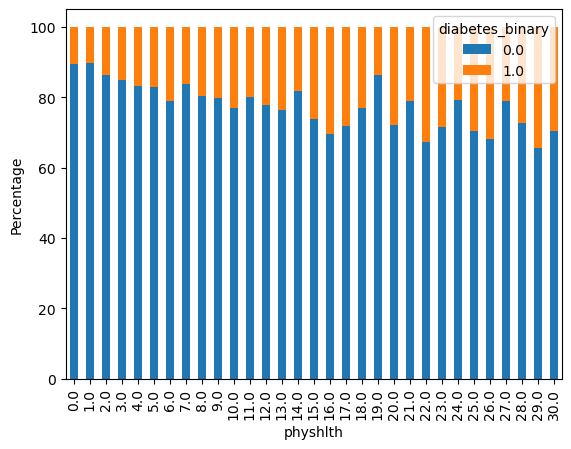

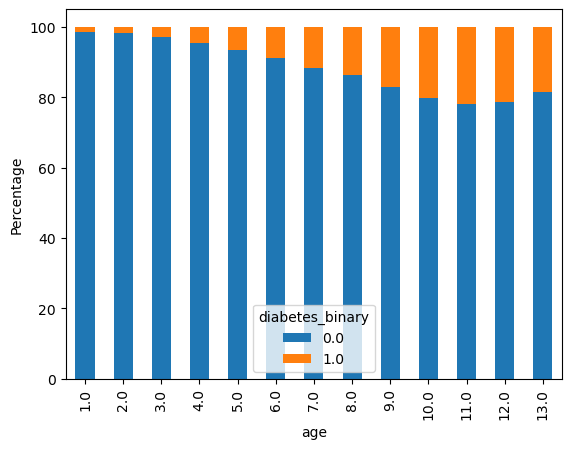

In [69]:
stacked_plot(num_cols, diabetes_df2)

# MODELING

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

A Couple of Different ways to do this:

- Run the normal train validate set on df1 : NonDiabetic/Prediabetic/Diabetic
- Resample for an equal weight of NonDiabetic/Prediabetic/Diabetic
- Run df2 : NonDiabetic/Diabetic
- Run the 50/50 split df : NonDiabetic/Diabetic

## diabetes_df1

In [71]:
# Lets get our x_train, y_train, etc.
def next_split(train, validate, test, target):
    '''This function creates your modeling variables with the train, validate, test 
    sets and returns them
    
    argument: train, validate, test
    
    return: X_train, X_validate, X_test, y_train, y_validate, y_test'''

    X_train = train.drop(columns=[target])

    X_validate = validate.drop(columns=[target])

    X_test = test.drop(columns=[target])

    y_train = train[target]

    y_validate = validate[target] 

    y_test = test[target]

    return X_train, X_validate, X_test, y_train, y_validate, y_test



In [72]:
X_train, X_validate, X_test, y_train, y_validate, y_test = next_split(train, validate, test, target='diabetes_012')

In [73]:
X_train.head()

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
167250,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,7.0,1.0,0.0,8.0,5.0,5.0
188878,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
140271,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,20.0,0.0,1.0,11.0,4.0,3.0
240633,1.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,12.0,4.0,5.0
105700,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,10.0,6.0,8.0


In [74]:
from sklearn.metrics import accuracy_score

In [75]:
def calculate_baseline_accuracy(y_train, y_validate):
    """
    Calculates the baseline accuracy for a classification problem.

    Parameters:
    y_train (pandas.Series): The training target variable.
    y_validate (pandas.Series): The validation target variable.

    Returns:
    None
    """
    # Calculate the baseline accuracy
    baseline_acc = y_train.mean()

    # Calculate the accuracy of the baseline prediction on the validation set
    baseline_pred = [y_train.mode()[0]] * len(y_validate)
    baseline_acc = accuracy_score(y_validate, baseline_pred)

    # Print the baseline accuracy on the validation set
    print(f"Baseline accuracy on validation set: {baseline_acc:.4f}")

In [76]:
calculate_baseline_accuracy(y_train, y_validate)

Baseline accuracy on validation set: 0.8424


### Random Forest Classifier

In [183]:
def rforest(X_train, X_validate, y_train, y_validate):
    '''This function runs multiple random forest models up to 10 max depth and 10 min samples
    and provides them in a dataframe
    
    arguments: X_train, X_validate, y_train, y_validate 
    
    returns a pandas dataframe'''

    scores_all = []

    for x in range(1,11):
        
        # looping through min_samples_leaf front to back 
        # looping through max_depth back to front
        rf = RandomForestClassifier(random_state=7, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
        #fit it
        rf.fit(X_train, y_train)
        #transform it
        train_acc = rf.score(X_train, y_train)
        
        #evaluate on my validate data
        val_acc = rf.score(X_validate, y_validate)
        diff_acc = train_acc - val_acc
        scores_all.append([x, 11-x, train_acc, val_acc, diff_acc])

    scores_df = pd.DataFrame(scores_all, columns =['min_samples_leaf','max_depth','train_acc','val_acc', 'diff_acc'])
    scores_df = scores_df.sort_values('diff_acc', ascending=True)
    feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(15).plot(kind='barh')
    plt.title("Top 15 important features")
    plt.show()

    return scores_df

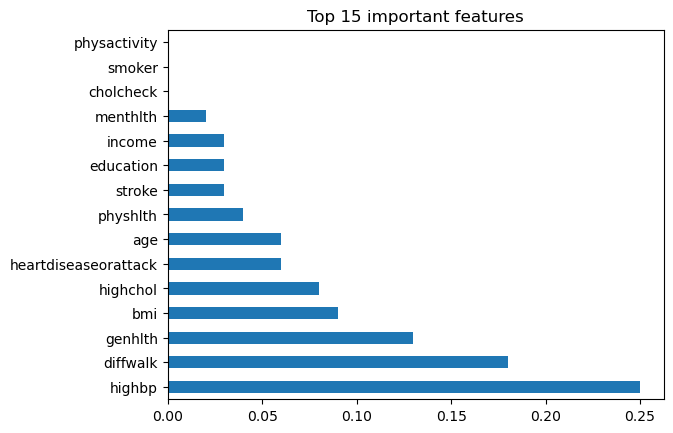

,min_samples_leaf,max_depth,train_acc,val_acc,diff_acc
6,7,4,0.842412,0.842405,0.000006
7,8,3,0.842412,0.842405,0.000006
8,9,2,0.842412,0.842405,0.000006
9,10,1,0.842412,0.842405,0.000006
5,6,5,0.844249,0.844113,0.000136
3,4,7,0.847332,0.846528,0.000804
4,5,6,0.845622,0.844787,0.000835
2,3,8,0.848592,0.846889,0.001703
1,2,9,0.850232,0.847710,0.002522
0,1,10,0.852344,0.848597,0.003747


In [184]:
scores_df1 = rforest(X_train, X_validate, y_train, y_validate)
scores_df1

In [79]:
def plotForest(scores_df):  
    '''graphs the random forest models from rforest function
    
    arguments: scores_df
    
    returns a matplotlib visual'''

    plt.figure(figsize=(12,6))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
    plt.xlabel('max depth and min leaf sample')
    plt.ylabel('accuracy')

    plt.xticks([1,2,3,4,5,6,7,8,9,10],
            [('1 and 10'),('2 and 9'),('3 and 8'),('4 and 7'),('5 and 6'),
            ('6 and 5'),('7 and 4'), ('8 and 3'), ('9 and 2'), ('10 and 1') ]
            )

    plt.title('Random Forest\nThe accuracy change with hyper parameter tuning on train and validate')
    plt.legend()
    plt.show()


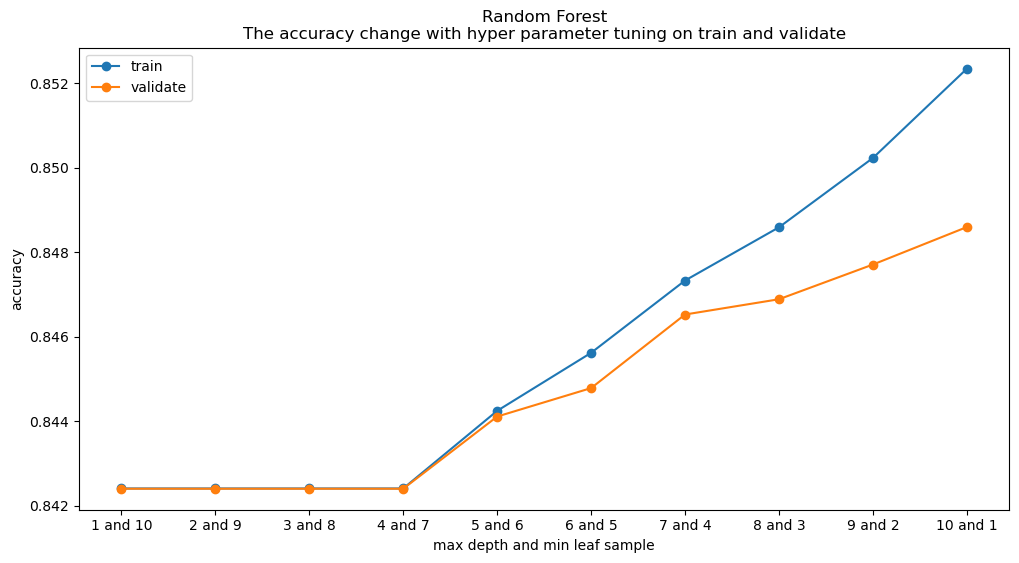

In [80]:
plotForest(scores_df1.sort_index())

In [176]:
#Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt'],
   

}

#Create a logistic regression model
rf = RandomForestClassifier(random_state=7)

#Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

#Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

#Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score on Train:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}
Best Accuracy Score on Train: 0.842805856680276


Train Set Accuracy: 0.9948050119667746
Validate Set Accuracy: 0.8415511464424151


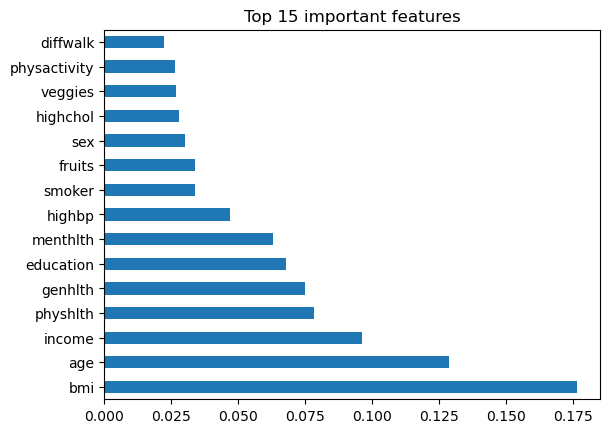

In [182]:
#-----------
#Train a Random Forest Model
rf = RandomForestClassifier(criterion='entropy', random_state=7, max_features='sqrt', n_estimators= 200)
rf.fit(X_train, y_train)

#Evaluate the Model on Train
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Set Accuracy: {train_accuracy}')

#Evaluate the Model on Validate
y_val_pred = rf.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_val_pred)
print(f'Validate Set Accuracy: {val_accuracy}')

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

### KNN

In [212]:
def get_knn_k(X_train, X_validate, y_train, y_validate, k):
    '''runs the knn with 15 neighbors
    
    arguments: X_train, X_validate, y_train, y_validate
    
    return: train and validate accuracy scores'''
    k=k
    knn_k =  KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_k.fit(X_train, y_train)
    print(f' Accuracy of KNN on train data is {knn_k.score(X_train, y_train)}')
    print(f' Accuracy of KNN on validate data is {knn_k.score(X_validate, y_validate)}')

In [82]:
def get_knn(X_train, X_validate, y_train, y_validate):
    '''graphs the knn models
    
    arguments: X_train, X_validate, y_train, y_validate
    
    return: a matplotlib visual'''

    k_range = range(1, 20)
    train_scores = []
    validate_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))
        validate_scores.append(knn.score(X_validate, y_validate))
    plt.figure(figsize=(12,6))
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('KNN\nThe accuracy change with hyper parameter tuning on train and validate')
    plt.plot(k_range, train_scores, label='Train')
    plt.plot(k_range, validate_scores, label='Validate')
    plt.legend()
    plt.xticks([0,5,10,15,20])
    plt.show()


In [213]:
get_knn_k(X_train, X_validate, y_train, y_validate, 15)

 Accuracy of KNN on train data is 0.8532310291426158
 Accuracy of KNN on validate data is 0.841436173707378


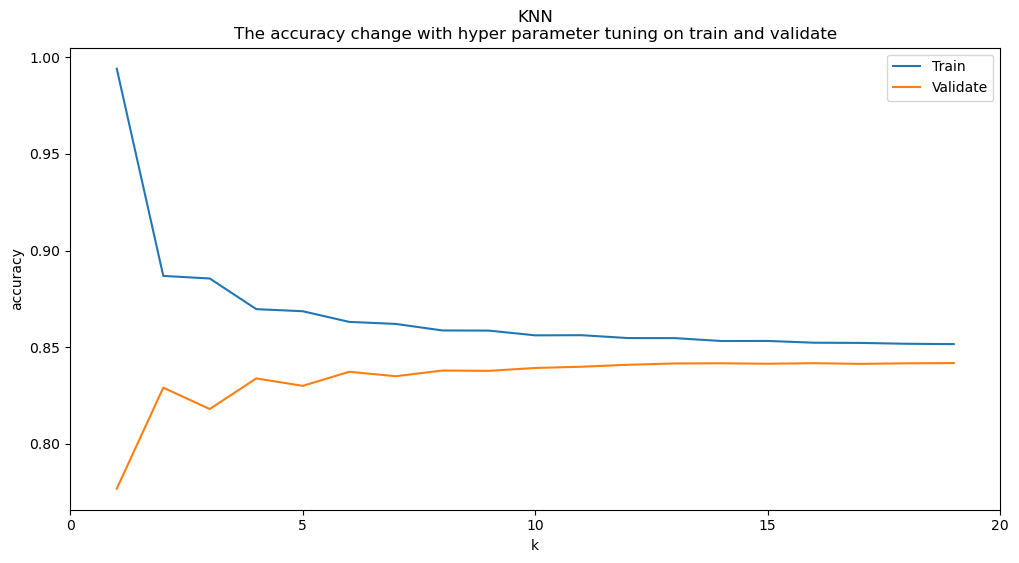

In [84]:
get_knn(X_train, X_validate, y_train, y_validate)

In [103]:
#Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3,5,7,9,12,15,18],
    
    'weights':['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size' : [10,20,30,40]
}

#Create a logistic regression model
knn = KNeighborsClassifier()

#Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

#Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

#Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score on Train:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 18, 'weights': 'uniform'}
Best Accuracy Score on Train: 0.8426861889342531


In [104]:
#-----------
#Train a Logistic Regression Model
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=18, weights='uniform')
knn.fit(X_train, y_train)

#Evaluate the Model on Train
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Set Accuracy: {train_accuracy}')

#Evaluate the Model on Validate
y_val_pred = knn.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_val_pred)
print(f'Validate Set Accuracy: {val_accuracy}')


Train Set Accuracy: 0.851759819794453
Validate Set Accuracy: 0.8416496945010183


### Logistic Regresssion

In [85]:
from sklearn.inspection import DecisionBoundaryDisplay

In [86]:
def get_logreg(X_train, X_validate, y_train, y_validate):
    '''runs the logistic regression model
    
    arguments: X_train, X_validate, y_train, y_validate
    return: train and validate accuracy scores'''
    logit = LogisticRegression(random_state=7)
    logit.fit(X_train, y_train)

    
    print(f' Accuracy of Logistic Regression on train is {logit.score(X_train, y_train)}')
    print(f' Accuracy of Logistic Regression on validate is {logit.score(X_validate, y_validate)}')

In [87]:
get_logreg(X_train, X_validate, y_train, y_validate)

 Accuracy of Logistic Regression on train is 0.8436294523440799
 Accuracy of Logistic Regression on validate is 0.8440969712896655


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
# scale the sets
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_validate_s = scaler.transform(X_validate)


In [92]:
#Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

#Create a logistic regression model
logreg = LogisticRegression(random_state=7)

#Create a grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

#Fit the grid search object to the training data
grid_search.fit(X_train_s, y_train)

#Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score on Train:", grid_search.best_score_)


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score on Train: 0.845910178797691


4631

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [186]:
#-----------
#Train a Logistic Regression Model
logreg = LogisticRegression(max_iter=100, random_state=7, C=1, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)

#Evaluate the Model on Train
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Set Accuracy: {train_accuracy}')

#Evaluate the Model on Validate
y_val_pred = logreg.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_val_pred)
print(f'Validate Set Accuracy: {val_accuracy}')


Train Set Accuracy: 0.8459242573560467
Validate Set Accuracy: 0.8470041390184614


# Now a resample on diabetes_df1 for equal weight of diabetes_012

In [148]:
diabetes_df1.shape

(253680, 22)

In [149]:
len(diabetes_df1[diabetes_df1.diabetes_012 == 1])

4631

In [150]:
prediabetic_df1 = diabetes_df1[diabetes_df1.diabetes_012 == 1]

In [151]:
not_diabetic_df1 = diabetes_df1[diabetes_df1.diabetes_012 == 0].sample(4631)

In [152]:
diabetic_df1 = diabetes_df1[diabetes_df1.diabetes_012 == 2].sample(4631)

In [153]:
diabetic_df1.head()

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
52039,2.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0
2744,2.0,1.0,1.0,1.0,41.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,0.0,4.0,6.0,5.0
185252,2.0,1.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,9.0,6.0,8.0
32250,2.0,1.0,1.0,1.0,37.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,8.0
67038,2.0,1.0,1.0,1.0,32.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,20.0,30.0,0.0,0.0,10.0,5.0,5.0


In [154]:
even_split_df1 = not_diabetic_df1.append(diabetic_df1)

In [155]:
even_split_df1.shape

(9262, 22)

In [156]:
even_split_df1 = even_split_df1.append(prediabetic_df1)

In [157]:
even_split_df1.shape

(13893, 22)

### Even split df is equal not_diabetic/prediabetic/diabetic with a total of 13893 rows

### Now we will scale them for modeling


In [158]:
# split into train, validate, test
train_e, validate_e, test_e = split_data(even_split_df1, 'diabetes_012')

Train: 0.559922263010149
Validate: 0.2400489455121284
Test: 0.2000287914777226


In [159]:
X_train_e, X_validate_e, X_test_e, y_train_e, y_validate_e, y_test_e = next_split(train_e, validate_e, test_e, 'diabetes_012')

In [160]:
y_train_e.value_counts()

0.0    2593
2.0    2593
1.0    2593
Name: diabetes_012, dtype: int64

In [161]:
y_validate_e.value_counts()

1.0    1112
0.0    1112
2.0    1111
Name: diabetes_012, dtype: int64

In [162]:
y_test_e.value_counts()

2.0    927
0.0    926
1.0    926
Name: diabetes_012, dtype: int64

In [163]:
X_train_e.head()

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
83795,1.0,0.0,1.0,25.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,8.0,5.0,8.0
182949,0.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,10.0,0.0,1.0,12.0,6.0,3.0
32509,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
224633,1.0,1.0,1.0,25.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,1.0,9.0,3.0,4.0
200382,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,30.0,1.0,0.0,8.0,6.0,2.0


In [164]:
y_train_e.head()

83795     0.0
182949    2.0
32509     0.0
224633    2.0
200382    0.0
Name: diabetes_012, dtype: float64

In [165]:
check_columns(X_train_e)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,highbp,2,"[1.0, 0.0]",0,0.0,float64
17,sex,2,"[1.0, 0.0]",0,0.0,float64
16,diffwalk,2,"[0.0, 1.0]",0,0.0,float64
12,nodocbccost,2,"[0.0, 1.0]",0,0.0,float64
11,anyhealthcare,2,"[1.0, 0.0]",0,0.0,float64
9,veggies,2,"[1.0, 0.0]",0,0.0,float64
8,fruits,2,"[0.0, 1.0]",0,0.0,float64
10,hvyalcoholconsump,2,"[0.0, 1.0]",0,0.0,float64
6,heartdiseaseorattack,2,"[1.0, 0.0]",0,0.0,float64
5,stroke,2,"[0.0, 1.0]",0,0.0,float64


### Lets scale them for modeling now


In [166]:

# scale the sets
scaler = StandardScaler()
X_train_es = scaler.fit_transform(X_train_e)
X_validate_es = scaler.transform(X_validate_e)

In [167]:
X_train_es

array([[ 0.84532189, -1.12573044,  0.15170433, -0.71882305,  1.03253836,
        -0.24337631,  2.39968142,  0.66515063, -1.26419792,  0.52503729,
        -0.20847246,  0.22599597, -0.34839362, -0.8139193 , -0.46955707,
        -0.39147005, -0.59818776,  1.10857559, -0.26113236,  0.11649805,
         1.11925267],
       [-1.18298131, -1.12573044,  0.15170433, -0.01092021,  1.03253836,
        -0.24337631, -0.41672198,  0.66515063, -1.26419792,  0.52503729,
        -0.20847246,  0.22599597, -0.34839362,  1.05047359, -0.46955707,
         0.39778592, -0.59818776,  1.10857559,  1.17521102,  1.07244562,
        -1.17209596],
       [-1.18298131,  0.88831213,  0.15170433, -0.57724248, -0.96848702,
        -0.24337631, -0.41672198,  0.66515063,  0.79101538,  0.52503729,
        -0.20847246,  0.22599597, -0.34839362, -1.74611575, -0.46955707,
        -0.58878404, -0.59818776, -0.90205847,  0.45703933,  1.07244562,
         1.11925267],
       [ 0.84532189,  0.88831213,  0.15170433, -0.71882305

### Lets get a baseline accuracy

In [168]:
calculate_baseline_accuracy(y_train_e, y_validate_e)

Baseline accuracy on validation set: 0.3334


## Random Forest Scaled Evensplit

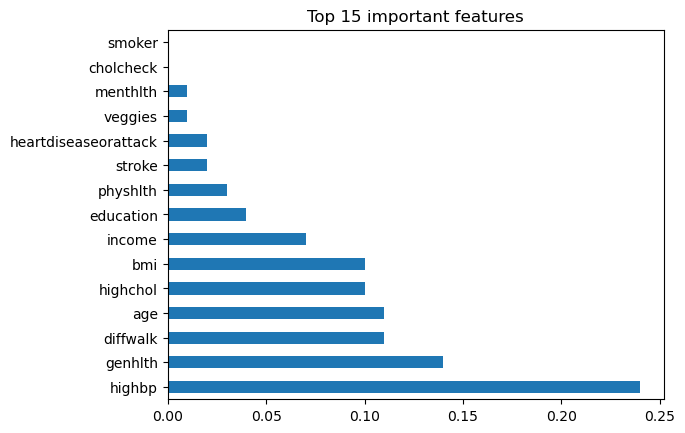

,min_samples_leaf,max_depth,train_acc,val_acc,diff_acc
9,10,1,0.486952,0.493553,-0.006601
8,9,2,0.495822,0.499850,-0.004028
7,8,3,0.502764,0.502849,-0.000085
6,7,4,0.512791,0.506147,0.006644
5,6,5,0.530145,0.509745,0.020400
4,5,6,0.547885,0.509745,0.038140
3,4,7,0.579380,0.511544,0.067836
2,3,8,0.618974,0.513343,0.105631
1,2,9,0.671937,0.519940,0.151997
0,1,10,0.741998,0.514243,0.227755


In [194]:
rforest(X_train_e, X_validate_e, y_train_e, y_validate_e)

Seeing which iteration performs the best

### RFC overfit

## KNN Scaled Evensplit


Find the best iteration of the model

In [171]:
#Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3,5,7,9,12,15,18],
    
    'weights':['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size' : [10,20,30,40]
}

#Create a logistic regression model
knn = KNeighborsClassifier()

#Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

#Fit the grid search object to the training data
grid_search.fit(X_train_es, y_train_e)

#Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score on Train:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 18, 'weights': 'distance'}
Best Accuracy Score on Train: 0.4830977277048083


In [175]:
#-----------
#Train a Logistic Regression Model
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=18, weights='distance')
knn.fit(X_train_es, y_train_e)

#Evaluate the Model on Train
y_train_pred_e = knn.predict(X_train_es)
train_accuracy = accuracy_score(y_train_e, y_train_pred_e)
print(f'Train Set Accuracy: {train_accuracy}')

#Evaluate the Model on Validate
y_val_pred_e = knn.predict(X_validate_es)
val_accuracy = accuracy_score(y_validate_e, y_val_pred_e)
print(f'Validate Set Accuracy: {val_accuracy}')

Train Set Accuracy: 0.9982002828127009
Validate Set Accuracy: 0.48875562218890556


### KNN OVerfit

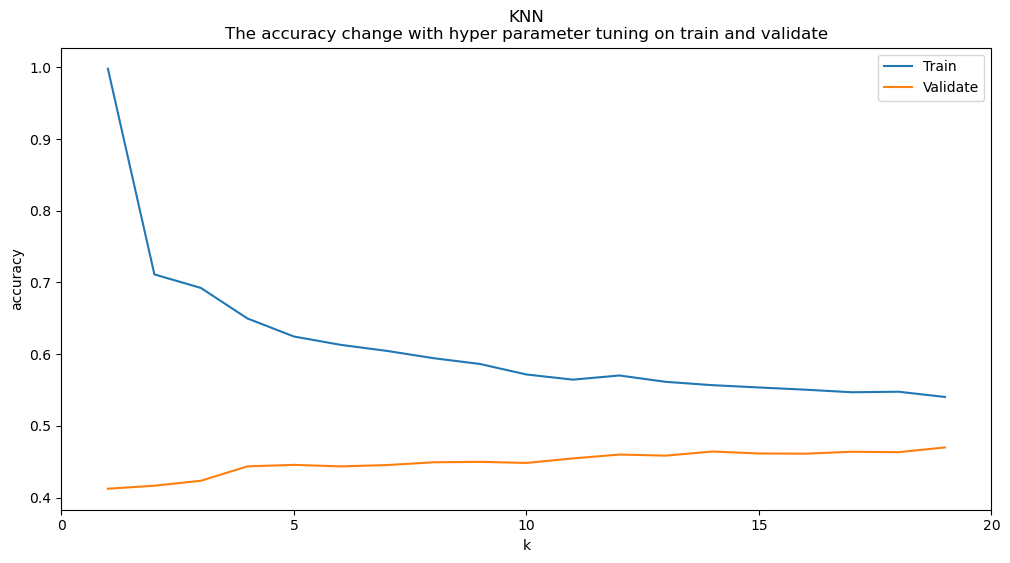

In [203]:
get_knn(X_train_e, X_validate_e, y_train_e, y_validate_e)

In [204]:
get_knn15(X_train_e, X_validate_e, y_train_e, y_validate_e)

 Accuracy of KNN on train data is 0.5535415863221493
 Accuracy of KNN on validate data is 0.46146926536731636


## Logistic Regression Scaled Evensplit

Find the best iteration of model

In [173]:
#Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

#Create a logistic regression model
logreg = LogisticRegression(random_state=7)

#Create a grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

#Fit the grid search object to the training data
grid_search.fit(X_train_es, y_train_e)

#Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score on Train:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy Score on Train: 0.5099633820745749


In [189]:
#-----------
#Train a Logistic Regression Model
logreg = LogisticRegression(max_iter=100, random_state=7, C=0.1, penalty='l2', solver='lbfgs')
logreg.fit(X_train_es, y_train_e)

#Evaluate the Model on Train
y_train_pred_e = logreg.predict(X_train_es)
train_accuracy = accuracy_score(y_train_e, y_train_pred_e)
print(f'Train Set Accuracy: {train_accuracy}')

#Evaluate the Model on Validate
y_val_pred_e = logreg.predict(X_validate_es)
val_accuracy = accuracy_score(y_validate_e, y_val_pred_e)
print(f'Validate Set Accuracy: {val_accuracy}')

Train Set Accuracy: 0.5156189741612033
Validate Set Accuracy: 0.5145427286356822


## Logistic Regression Model is Best for EvenSplit

In [205]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression

In [207]:

def select_kbest(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the SelectKBest process
    '''
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(X, y)
    mask = kbest.get_support()
    return X.columns[mask]

In [209]:
select_kbest(X_train_e, y_train_e, 7)

Index(['highbp', 'highchol', 'bmi', 'genhlth', 'diffwalk', 'age', 'income'], dtype='object')